<a href="https://colab.research.google.com/github/edilmita/edilmita/blob/main/Assingment_1_Naives_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## Topic 1: Supervised Learning Naives-Bayes


## Data set Information

This dataset includes data on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

After the perception of risk management, the consequence of predictive accuracy of the estimated probability of default will be more significant than the binary result of classification - credible or not credible consumers. Since the real probability of default is undetermined, this analysis stated the novel escorting Smoothing method to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.

The original labels are:

|  |X1	     | X2|X3	     |X4	     |X5 |X6	 |X7	 |X8  
|--|---------|---|---------|---------|---|-----|-----|-----
|ID|LIMIT_BAL|SEX|EDUCATION|MARRIAGE |AGE|PAY_0|PAY_2|PAY_3	


|X9   |X10	|X11	|X12	    |X13	    |X14	    |X15	
|-----|-----|-----|---------|---------|---------|--------      
|PAY_4|PAY_5|PAY_6|BILL_AMT1|BILL_AMT2|BILL_AMT3|BILL_AMT4



|X16	     | X17	   |X18	    |X19	   |X20	    |X21
|----------|---------|--------|--------|--------|--------	
|BILL_AMT5 |BILL_AMT6|PAY_AMT1|PAY_AMT2|PAY_AMT3|PAY_AMT4	



|X22	   |X23	    |Y
|--------|--------|--------------------------
|PAY_AMT5|PAY_AMT6|default payment next month

## Attribute Information:

This investigation used a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study examined the narrative and used the next 23 variables as explanatory variables:
* **X1**: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

* **X2**: Sex Gender (1 = male; 2 = female).

* **X3**: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others; 5=unknown, 6=unknown ).

* **X4**: Marital status (1 = married; 2 = single; 3 = others).

* **X5**: Age (in years).

* **X6 - X11**: History of past payment. We followed the past monthly payment data (from April to September 2005) as observes: X6 = the repayment status in September 2005; X7 = the repayment status in August 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

* **X12-X17**: Amount of bill statement (NT dollar). X12 = amount of bill statement in September 2005; X13 = amount of bill statement in August 2005; . . .; X17 = amount of bill statement in April 2005.

* **X18-X23**: Amount of previous payment (NT dollar). X18 = amount paid in September 2005; X19 = amount paid in August 2005; . . ..X23 = amount paid in April, 2005.

* **Y**: Default payment (1 = yes, 0 = no)


##Importing Libraries 











In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

## Importing the Credit Card Default 

In [ ]:
mydata = pd.read_csv('/content/credit_defaults.csv')
mydata = mydata.sample(n=2000,replace =False,random_state=1)
mydata.head(5)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
10747  10748     310000    1          3         1   32      0      0      0   
12573  12574      10000    2          3         1   49     -1     -1     -2   
29676  29677      50000    1          2         1   28     -1     -1     -1   
8856    8857      80000    2          3         1   52      2      2      3   
21098  21099     270000    1          1         2   34      1      2      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
10747      0  ...      84373      57779      14163      8295      6000   
12573     -1  ...       1690       1138        930         0         0   
29676      0  ...      45975       1300      43987         0     46257   
8856       3  ...      40748      39816      40607      3700      1600   
21098      0  ...      22448      15490      17343         0      4000   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default_payment_next_month  
10747      4000      3000      1000      2000                           0  
12573      2828         0       182         0                           1  
29676      2200      1300     43987      1386                           0  
8856       1600         0      1600      1600                           1  
21098      2000         0      2000      2000                           0  

[5 rows x 25 columns]


####Displays the last five rows of the data frame by default. 


|index|ID|LIMIT\_BAL|SEX|EDUCATION|MARRIAGE|AGE|PAY\_0|PAY\_2|PAY\_3|PAY\_4|PAY\_5|PAY\_6|BILL\_AMT1|BILL\_AMT2|BILL\_AMT3|BILL\_AMT4|BILL\_AMT5|BILL\_AMT6|PAY\_AMT1|PAY\_AMT2|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|10747|10748|310000|1|3|1|32|0|0|0|0|0|0|172772|152397|110375|84373|57779|14163|8295|6000|
|12573|12574|10000|2|3|1|49|-1|-1|-2|-1|2|2|32|-358|-748|1690|1138|930|0|0|
|29676|29677|50000|1|2|1|28|-1|-1|-1|0|-1|-1|430|0|46257|45975|1300|43987|0|46257|
|8856|8857|80000|2|3|1|52|2|2|3|3|3|2|36649|39448|40101|40748|39816|40607|3700|1600|
|21098|21099|270000|1|1|2|34|1|2|0|0|2|0|20979|17228|20924|22448|15490|17343|0|4000|

In [ ]:
mydata.tail() 

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
23295  23296     160000    2          1         2   25     -1      0     -1   
15148  15149     250000    1          1         1   53     -2     -2     -2   
18666  18667      50000    2          1         2   23     -1     -1     -2   
3415    3416     200000    2          2         1   37      0      0      0   
18714  18715     420000    2          1         2   28      0      0     -1   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
23295     -1  ...       2199      10856          0      1000     11426   
15148     -2  ...          0          0          0         0         0   
18666     -2  ...          0          0          0         0         0   
3415       0  ...     191730     171269     151550      8017      8000   
18714      0  ...      65592      57438      31029      1010     64513   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default_payment_next_month  
23295      2199     10000         0      9867                           0  
15148         0         0         0         0                           1  
18666         0         0         0         0                           0  
3415       8000      9000      7000      6000                           0  
18714      2420      1473      1062      1022                           0  

[5 rows x 25 columns]

|index|ID|LIMIT\_BAL|SEX|EDUCATION|MARRIAGE|AGE|PAY\_0|PAY\_2|PAY\_3|PAY\_4|PAY\_5|PAY\_6|BILL\_AMT1|BILL\_AMT2|BILL\_AMT3|BILL\_AMT4|BILL\_AMT5|BILL\_AMT6|PAY\_AMT1|PAY\_AMT2|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|23295|23296|160000|2|1|2|25|-1|0|-1|-1|0|0|6087|1934|11376|2199|10856|0|1000|11426|
|15148|15149|250000|1|1|1|53|-2|-2|-2|-2|-2|-2|0|0|0|0|0|0|0|0|
|18666|18667|50000|2|1|2|23|-1|-1|-2|-2|-2|-2|2332|0|0|0|0|0|0|0|
|3415|3416|200000|2|2|1|37|0|0|0|0|0|0|184144|189158|190569|191730|171269|151550|8017|8000|
|18714|18715|420000|2|1|2|28|0|0|-1|0|0|0|7880|4623|64513|65592|57438|31029|1010|64513|

In [ ]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 10747 to 18714
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          2000 non-null   int64
 1   LIMIT_BAL                   2000 non-null   int64
 2   SEX                         2000 non-null   int64
 3   EDUCATION                   2000 non-null   int64
 4   MARRIAGE                    2000 non-null   int64
 5   AGE                         2000 non-null   int64
 6   PAY_0                       2000 non-null   int64
 7   PAY_2                       2000 non-null   int64
 8   PAY_3                       2000 non-null   int64
 9   PAY_4                       2000 non-null   int64
 10  PAY_5                       2000 non-null   int64
 11  PAY_6                       2000 non-null   int64
 12  BILL_AMT1                   2000 non-null   int64
 13  BILL_AMT2                   2000 non-null   int64
 14  BIL



```
Int64Index: 2000 entries, 10747 to 18714
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          2000 non-null   int64
 1   LIMIT_BAL                   2000 non-null   int64
 2   SEX                         2000 non-null   int64
 3   EDUCATION                   2000 non-null   int64
 4   MARRIAGE                    2000 non-null   int64
 5   AGE                         2000 non-null   int64
 6   PAY_0                       2000 non-null   int64
 7   PAY_2                       2000 non-null   int64
 8   PAY_3                       2000 non-null   int64
 9   PAY_4                       2000 non-null   int64
 10  PAY_5                       2000 non-null   int64
 11  PAY_6                       2000 non-null   int64
 12  BILL_AMT1                   2000 non-null   int64
 13  BILL_AMT2                   2000 non-null   int64
 14  BILL_AMT3                   2000 non-null   int64
 15  BILL_AMT4                   2000 non-null   int64
 16  BILL_AMT5                   2000 non-null   int64
 17  BILL_AMT6                   2000 non-null   int64
 18  PAY_AMT1                    2000 non-null   int64
 19  PAY_AMT2                    2000 non-null   int64
 20  PAY_AMT3                    2000 non-null   int64
 21  PAY_AMT4                    2000 non-null   int64
 22  PAY_AMT5                    2000 non-null   int64
 23  PAY_AMT6                    2000 non-null   int64
 24  default_payment_next_month  2000 non-null   int64
dtypes: int64(25)
memory usage: 406.2 KB



### Now we can get a descriptive statistics summary of a given dataframe

In [ ]:
mydata.describe()

ID      LIMIT_BAL          SEX    EDUCATION     MARRIAGE  \
count   2000.000000    2000.000000  2000.000000  2000.000000  2000.000000   
mean   14950.749000  171825.000000     1.603000     1.853000     1.555000   
std     8624.251173  131598.930521     0.489398     0.798567     0.516825   
min        3.000000   10000.000000     1.000000     1.000000     0.000000   
25%     7404.000000   60000.000000     1.000000     1.000000     1.000000   
50%    14889.500000  140000.000000     2.000000     2.000000     2.000000   
75%    22510.250000  250000.000000     2.000000     2.000000     2.000000   
max    29993.000000  730000.000000     2.000000     6.000000     3.000000   

               AGE        PAY_0        PAY_2        PAY_3        PAY_4  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean     35.458000    -0.024500    -0.138500    -0.179500    -0.213000  ...   
std       9.144892     1.103861     1.163613     1.177698     1.166753  ...   
min      21.000000    -2.000000    -2.000000    -2.000000    -2.000000  ...   
25%      28.000000    -1.000000    -1.000000    -1.000000    -1.000000  ...   
50%      34.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%      41.000000     0.000000     0.000000     0.000000     0.000000  ...   
max      71.000000     6.000000     5.000000     8.000000     7.000000  ...   

           BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count    2000.000000    2000.000000    2000.000000    2000.000000   
mean    44390.095500   41502.586000   39643.917000    5153.111500   
std     65827.281839   61928.132672   60472.016246   13065.162427   
min    -81334.000000  -15306.000000  -51443.000000       0.000000   
25%      2939.500000    2158.750000    1319.250000    1000.000000   
50%     19454.000000   18652.000000   17621.500000    2022.500000   
75%     53394.250000   51005.500000   49484.750000    5000.000000   
max    487066.000000  489200.000000  513798.000000  276698.000000   

           PAY_AMT2       PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  2.000000e+03    2000.000000    2000.000000    2000.000000   
mean   6.362411e+03    6096.214000    5091.073500    5043.292500   
std    4.014712e+04   21880.625777   16197.840731   16448.820691   
min    0.000000e+00       0.000000       0.000000       0.000000   
25%    9.947500e+02     445.500000     328.250000     260.250000   
50%    2.031500e+03    1843.000000    1597.500000    1500.000000   
75%    5.000000e+03    5000.000000    4295.500000    4207.750000   
max    1.684259e+06  400972.000000  331788.000000  379267.000000   

            PAY_AMT6  default_payment_next_month  
count    2000.000000                 2000.000000  
mean     5738.555500                    0.219500  
std     21310.318739                    0.414011  
min         0.000000                    0.000000  
25%       166.750000                    0.000000  
50%      1464.000000                    0.000000  
75%      4000.000000                    0.000000  
max    403500.000000                    1.000000  

[8 rows x 25 columns]

|index|ID|LIMIT\_BAL|SEX|EDUCATION|MARRIAGE|AGE|PAY\_0|PAY\_2|PAY\_3|PAY\_4|PAY\_5|PAY\_6|BILL\_AMT1|BILL\_AMT2|BILL\_AMT3|BILL\_AMT4|BILL\_AMT5|BILL\_AMT6|PAY\_AMT1|PAY\_AMT2|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|count|2000\.0|2000\.0|2000\.0|2000\.0|2000\.0|2000\.0|2000\.0|2000\.0|2000\.0|2000\.0|2000\.0|2000\.0|2000\.0|2000\.0|2000\.0|2000\.0|2000\.0|2000\.0|2000\.0|2000\.0|
|mean|14950\.749|171825\.0|1\.603|1\.853|1\.555|35\.458|-0\.0245|-0\.1385|-0\.1795|-0\.213|-0\.25|-0\.272|53341\.0915|50172\.8045|48239\.365|44390\.0955|41502\.586|39643\.917|5153\.1115|6362\.411|
|std|8624\.251172718945|131598\.93052094735|0\.4893983606201484|0\.7985673765734885|0\.516825458232408|9\.144892045577281|1\.1038609534276729|1\.163612799591723|1\.177698279109853|1\.1667526112368098|1\.1354050256565464|1\.1664888975785783|76676\.06510372728|72959\.3061731395|78505\.84385153883|65827\.28183939058|61928\.13267150636|60472\.01624583497|13065\.162426571058|40147\.124371288664|
|min|3\.0|10000\.0|1\.0|1\.0|0\.0|21\.0|-2\.0|-2\.0|-2\.0|-2\.0|-2\.0|-2\.0|-8187\.0|-18088\.0|-9032\.0|-81334\.0|-15306\.0|-51443\.0|0\.0|0\.0|
|25%|7404\.0|60000\.0|1\.0|1\.0|1\.0|28\.0|-1\.0|-1\.0|-1\.0|-1\.0|-1\.0|-1\.0|3974\.75|3057\.75|3048\.5|2939\.5|2158\.75|1319\.25|1000\.0|994\.75|
|50%|14889\.5|140000\.0|2\.0|2\.0|2\.0|34\.0|0\.0|0\.0|0\.0|0\.0|0\.0|0\.0|23410\.0|21378\.5|20463\.0|19454\.0|18652\.0|17621\.5|2022\.5|2031\.5|
|75%|22510\.25|250000\.0|2\.0|2\.0|2\.0|41\.0|0\.0|0\.0|0\.0|0\.0|0\.0|0\.0|70972\.5|65359\.5|60568\.5|53394\.25|51005\.5|49484\.75|5000\.0|5000\.0|
|max|29993\.0|730000\.0|2\.0|6\.0|3\.0|71\.0|6\.0|5\.0|8\.0|7\.0|7\.0|7\.0|746814\.0|562316\.0|1664089\.0|487066\.0|489200\.0|513798\.0|276698\.0|1684259\.0|

> Indented block



### **There are 2000 individual credit card customers.**

### **The average value for a credit card limit is 171,825.** 

### **The standard deviation is unusually large, the max value is 730,000.**

### **Education Level is mostly graduate school and university.**

### **Most of the clients are either married or single.**

### **The average age is 35.5 years, with a standard deviation of 9.2.**

### **Because the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.219 means that there are 22.1% of credit card agreements that will default the following month (this will be verified in the subsequent sections of this evaluation).**



##Executes Python function provided by the user on a column (columns) of DataFrame connected to its input port. 

In [ ]:
mydata.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

* Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',      'default_payment_next_month'], 
dtype='object')

In [ ]:
mydata.index = mydata['ID']
mydata.head(3)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
ID                                                                            
10748  10748     310000    1          3         1   32      0      0      0   
12574  12574      10000    2          3         1   49     -1     -1     -2   
29677  29677      50000    1          2         1   28     -1     -1     -1   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
ID            ...                                                        
10748      0  ...      84373      57779      14163      8295      6000   
12574     -1  ...       1690       1138        930         0         0   
29677      0  ...      45975       1300      43987         0     46257   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default_payment_next_month  
ID                                                                         
10748      4000      3000      1000      2000                           0  
12574      2828         0       182         0                           1  
29677      2200      1300     43987      1386                           0  

[3 rows x 25 columns]

In [ ]:
mydata.index = mydata['ID']
mydata.head(3)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
ID                                                                            
10748  10748     310000    1          3         1   32      0      0      0   
12574  12574      10000    2          3         1   49     -1     -1     -2   
29677  29677      50000    1          2         1   28     -1     -1     -1   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
ID            ...                                                        
10748      0  ...      84373      57779      14163      8295      6000   
12574     -1  ...       1690       1138        930         0         0   
29677      0  ...      45975       1300      43987         0     46257   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default_payment_next_month  
ID                                                                         
10748      4000      3000      1000      2000                           0  
12574      2828         0       182         0                           1  
29677      2200      1300     43987      1386                           0  

[3 rows x 25 columns]

###Remove columns ID and corresponding axis

In [ ]:
mydata.drop('ID',axis=1,inplace=True)
mydata.head(1)

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                            
10748     310000    1          3         1   32      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
ID            ...                                                        
10748      0  ...      84373      57779      14163      8295      6000   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default_payment_next_month  
ID                                                                         
10748      4000      3000      1000      2000                           0  

[1 rows x 24 columns]

In [ ]:
mydata.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

### Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',      'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',        'default_payment_next_month'],     dtype='object')





## Returns the summatory of a Data Frame object where all the values are replaced with a Boolean value True for NULL values,and otherwise False.

In [ ]:
mydata.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64



```
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

```



### We removed the rows that contains NULL values and sumariza the 
### 1 = male; 2 = female

In [ ]:
mydata['SEX'].value_counts(dropna=False)

2    1206
1     794
Name: SEX, dtype: int64

###2  =  1206
###1  =   794
####Name: SEX, dtype: int64

> Indented block



### We removed the rows that contains NULL values and sumariza the 
### 1 = Yes; 2 = No

In [ ]:
mydata['default_payment_next_month'].value_counts(dropna=False)

0    1561
1     439
Name: default_payment_next_month, dtype: int64

### 0           = 1561
### 1           = 439
### Name: default_payment_next_month,dtype: int64

### We removed the rows that contains NULL values and sumariza the 
###1 = graduate school; 
###2 = university; 
###3 = high school; 
###4 = others; 
###5=unknown, 
###6=unknown

In [ ]:
mydata['EDUCATION'].value_counts(dropna=False)

2    925
1    715
3    325
5     18
4     13
6      4
Name: EDUCATION, dtype: int64

###2  =   925
###1  =  715
###3  =  325
###5  =   18
###4  =   13
###6  =    4
#### Name: EDUCATION, dtype: int64




### Renames Columns

In [ ]:
mydata = mydata.rename(columns={'default_payment_next_month': 'def_pay', 'PAY_0':'PAY_1'})

mydata.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
ID                                                                            
10748     310000    1          3         1   32      0      0      0      0   
12574      10000    2          3         1   49     -1     -1     -2     -1   
29677      50000    1          2         1   28     -1     -1     -1      0   
8857       80000    2          3         1   52      2      2      3      3   
21099     270000    1          1         2   34      1      2      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
ID            ...                                                        
10748      0  ...      84373      57779      14163      8295      6000   
12574      2  ...       1690       1138        930         0         0   
29677     -1  ...      45975       1300      43987         0     46257   
8857       3  ...      40748      39816      40607      3700      1600   
21099      2  ...      22448      15490      17343         0      4000   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  def_pay  
ID                                                      
10748      4000      3000      1000      2000        0  
12574      2828         0       182         0        1  
29677      2200      1300     43987      1386        0  
8857       1600         0      1600      1600        1  
21099      2000         0      2000      2000        0  

[5 rows x 24 columns]

|ID|LIMIT\_BAL|SEX|EDUCATION|MARRIAGE|AGE|PAY\_1|PAY\_2|PAY\_3|PAY\_4|PAY\_5|PAY\_6|BILL\_AMT1|BILL\_AMT2|BILL\_AMT3|BILL\_AMT4|BILL\_AMT5|BILL\_AMT6|PAY\_AMT1|PAY\_AMT2|PAY\_AMT3|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|10748|310000|1|3|1|32|0|0|0|0|0|0|172772|152397|110375|84373|57779|14163|8295|6000|4000|
|12574|10000|2|3|1|49|-1|-1|-2|-1|2|2|32|-358|-748|1690|1138|930|0|0|2828|
|29677|50000|1|2|1|28|-1|-1|-1|0|-1|-1|430|0|46257|45975|1300|43987|0|46257|2200|
|8857|80000|2|3|1|52|2|2|3|3|3|2|36649|39448|40101|40748|39816|40607|3700|1600|1600|
|21099|270000|1|1|2|34|1|2|0|0|2|0|20979|17228|20924|22448|15490|17343|0|4000|2000|

### Display Columns

In [ ]:
mydata.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

###Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',        'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],       dtype='object')

## Data Visualization and Analysis #

#### KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous ####

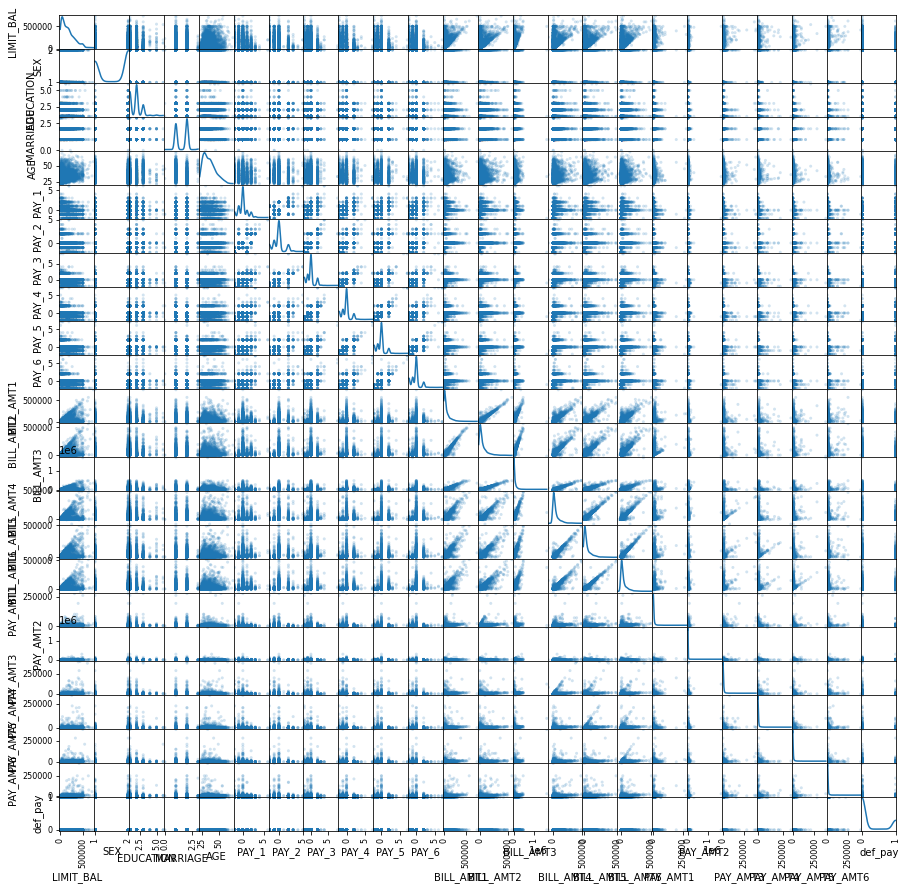

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(mydata, alpha=0.2, figsize=(15,15), diagonal= 'kde' )
plt.show()


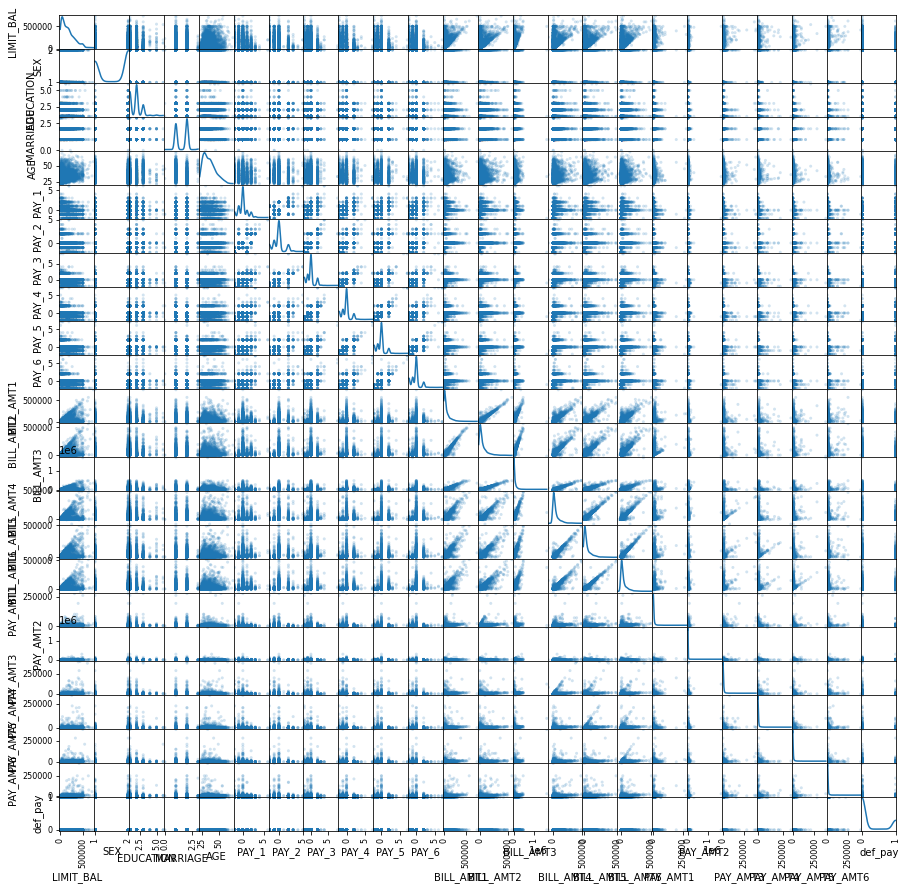

### Gender Plot

Text(0.5, 1.0, 'GENDER v/s COUNT')

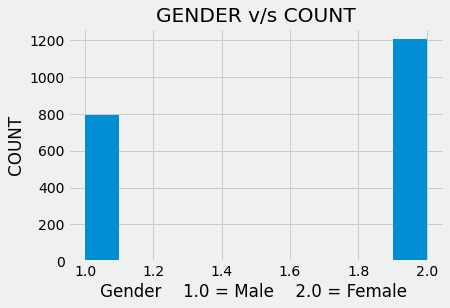

In [ ]:
plt.style.use('fivethirtyeight')
mydata['SEX'].hist()
plt.xlabel('Gender' '    1.0 = Male' '    2.0 = Female ' )
plt.ylabel('COUNT')
plt.title('GENDER v/s COUNT')

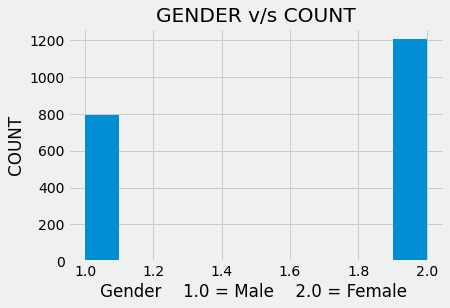

### **The number of females is higher than Males.** 

###Previous Results 
### Females    1206
### Males       794

### Default Payment Next Month Plot

Text(0.5, 1.0, 'Default Credit Card Clients - target value - data unbalance\n')

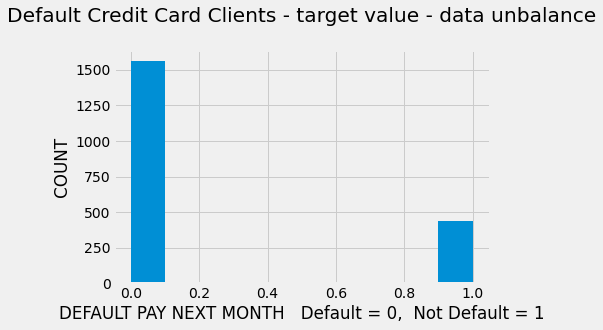

In [ ]:
plt.style.use('fivethirtyeight')
mydata['def_pay'].hist()
plt.xlabel('DEFAULT PAY NEXT MONTH''   Default = 0,  Not Default = 1')
plt.ylabel('COUNT')
plt.title('Default Credit Card Clients - target value - data unbalance\n')


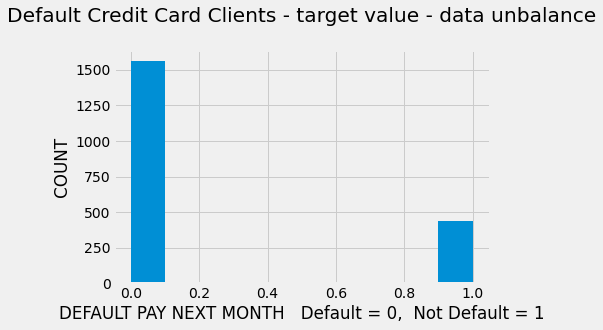

###1 = yes, 0 = no

### 0  =   1561
### 1  =   439



### Education Plot

Text(0.5, 1.0, 'EDUCATION')

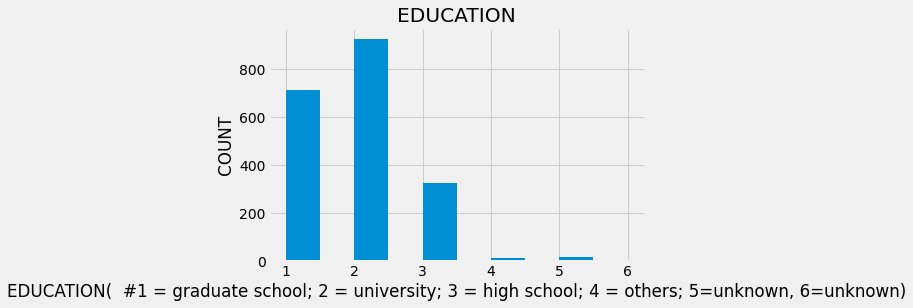

In [ ]:
plt.style.use('fivethirtyeight')
mydata['EDUCATION'].hist()
plt.xlabel('EDUCATION''(  #1 = graduate school; 2 = university; 3 = high school; 4 = others; 5=unknown, 6=unknown)')
plt.ylabel('COUNT')
plt.title('EDUCATION')

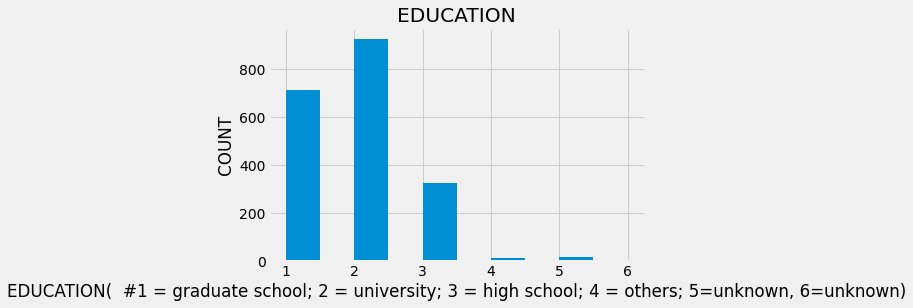

###1 = graduate school; 2 = university; 3 = high school; 4 = others; 5=unknown, 6=unknown

### 2    925
### 1    715
### 3    325
### 5     18
### 4     13
### 6      4

**### More number of credit holders are university students followed by Graduates and then High school students**

## Marriage Plot

Text(0.5, 1.0, 'MARRIAGE v/s COUNT')

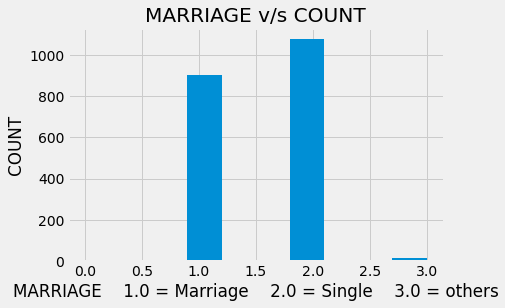

In [ ]:
plt.style.use('fivethirtyeight')
mydata['MARRIAGE'].hist()
plt.xlabel('MARRIAGE''    1.0 = Marriage' '    2.0 = Single ' '   3.0 = others')
plt.ylabel('COUNT')
plt.title('MARRIAGE v/s COUNT')

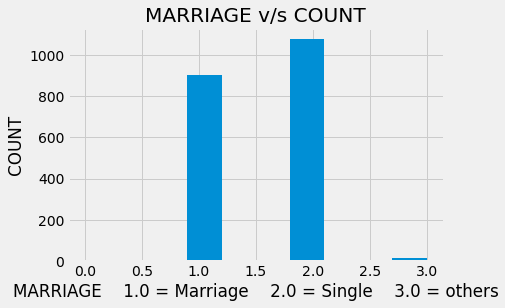

### **We have more Marrieds customers with a credit card than singles.**


## Gender Matplot

### Checking the number by Gender

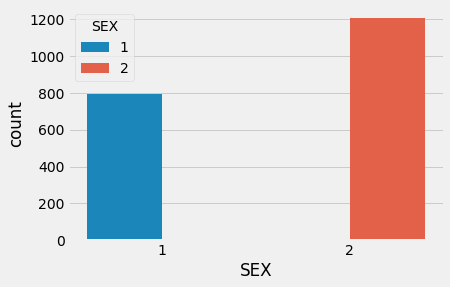

In [ ]:
sns.countplot(x='SEX',data=mydata,hue = 'SEX')


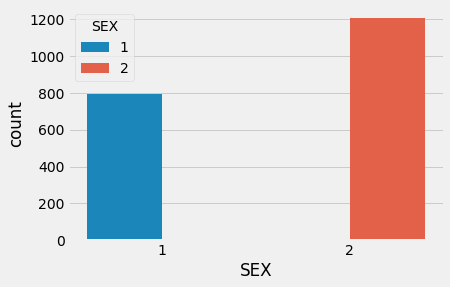

## Gender Vs Default of payment

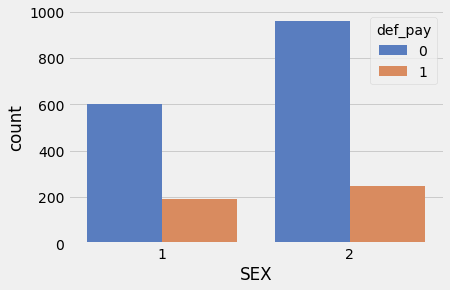

In [ ]:
sns.countplot(x='SEX', data=mydata,hue="def_pay", palette="muted")  

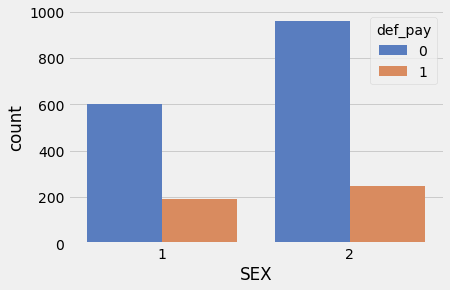

### ***It is obvious from the above graphics that females have general fever default payments vs males.***

## Married Status Vs Default of payment

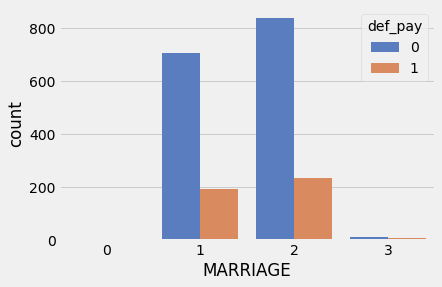

In [ ]:
g=sns.countplot(x="MARRIAGE", data=mydata,hue="def_pay", palette="muted")

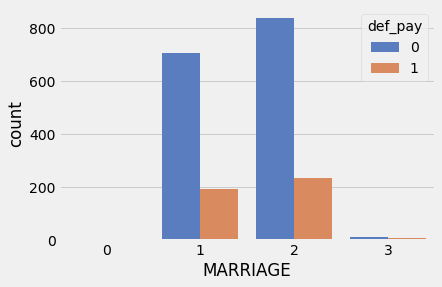

### ***From the above plot it is clear that those people who have marital status single have less default make the payment versus married status people.*** 

 ### **Non-Defaults have a higher proportion of Married =2**

### Education Vs Default of payment

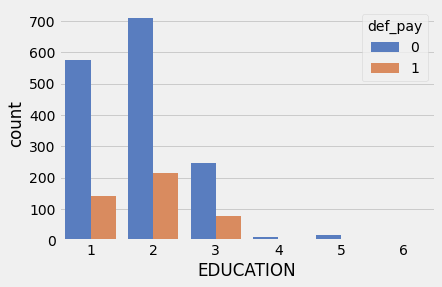

In [ ]:
g=sns.countplot(x="EDUCATION", data=mydata,hue="def_pay", palette="muted")

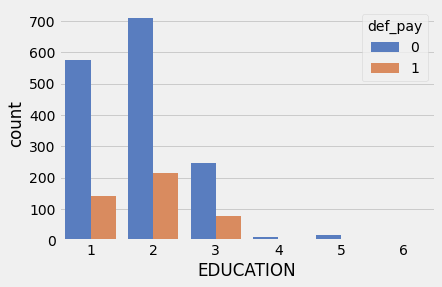

### ***From the above plot is clear that those people who are university students have fewer default***
### ***payment vs graduates and high school people.***


## Each month payments Vs Default of payment

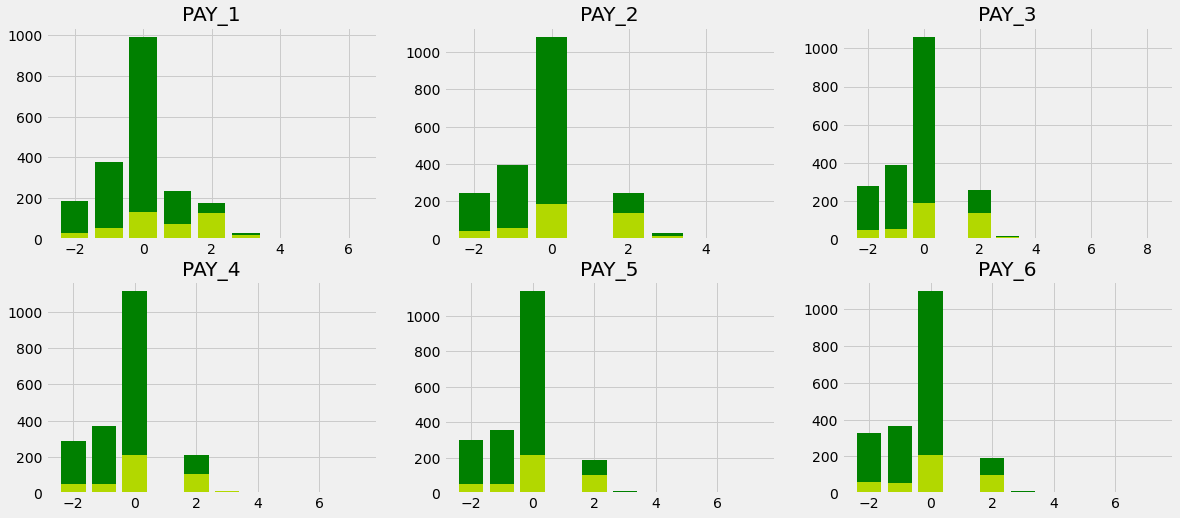

In [ ]:
def getColumnsNames(prefix):
    return [prefix+str(x) for x in range(1,7)]
# PAY_1 , PAY_2 , PAY_3 , PAY_4 , PAY_5, PAY_6
pay_status_columns = getColumnsNames('PAY_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = mydata[pay_status_columns[i]].value_counts()
    x = mydata[pay_status_columns[i]][(mydata['def_pay']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='green')
    ax[row,col].bar(x.index, x, align='center', color='yellow', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])

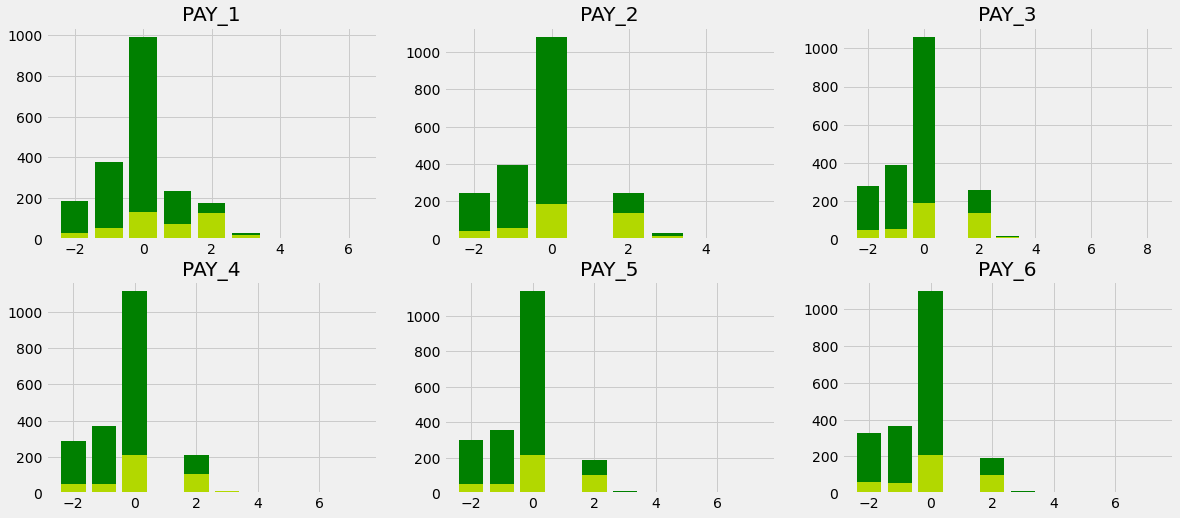

###The above figure shows a bar plot for each month’s payment status which shows the count of 
###defaulters and non-defaulter.

## Payment Amount Vs Default of payment

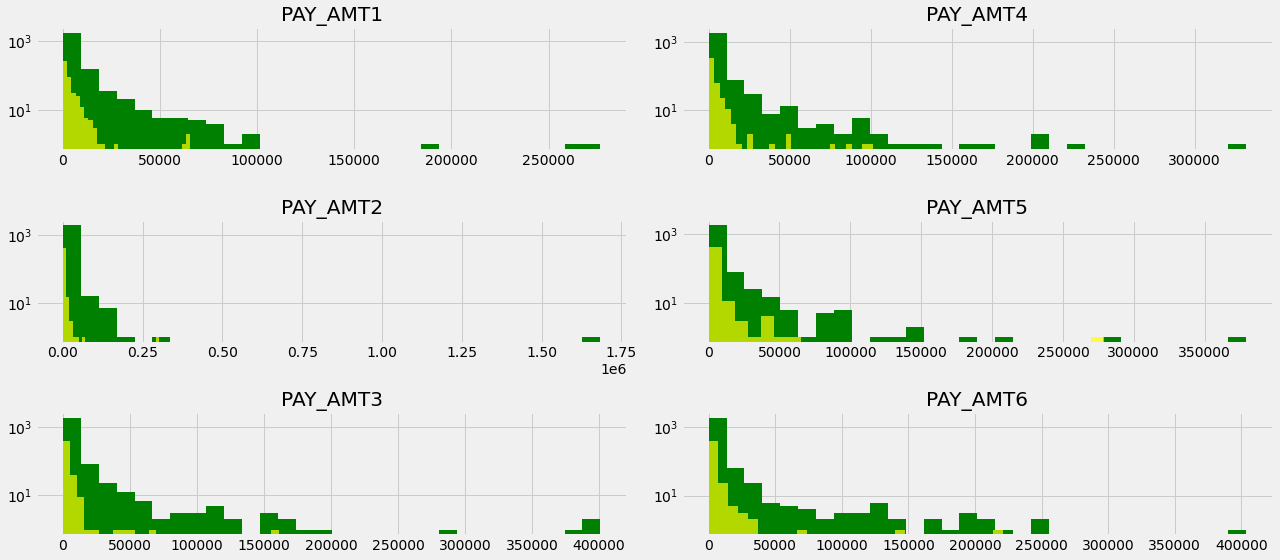

In [ ]:
pay_amt_columns = getColumnsNames('PAY_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(mydata[pay_amt_columns[i]], 30, color ='green')
    ax[row,col].hist(mydata[pay_amt_columns[i]][(mydata['def_pay']==1)],30,color='yellow',alpha = 0.7)
    ax[row,col].set_title(pay_amt_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()


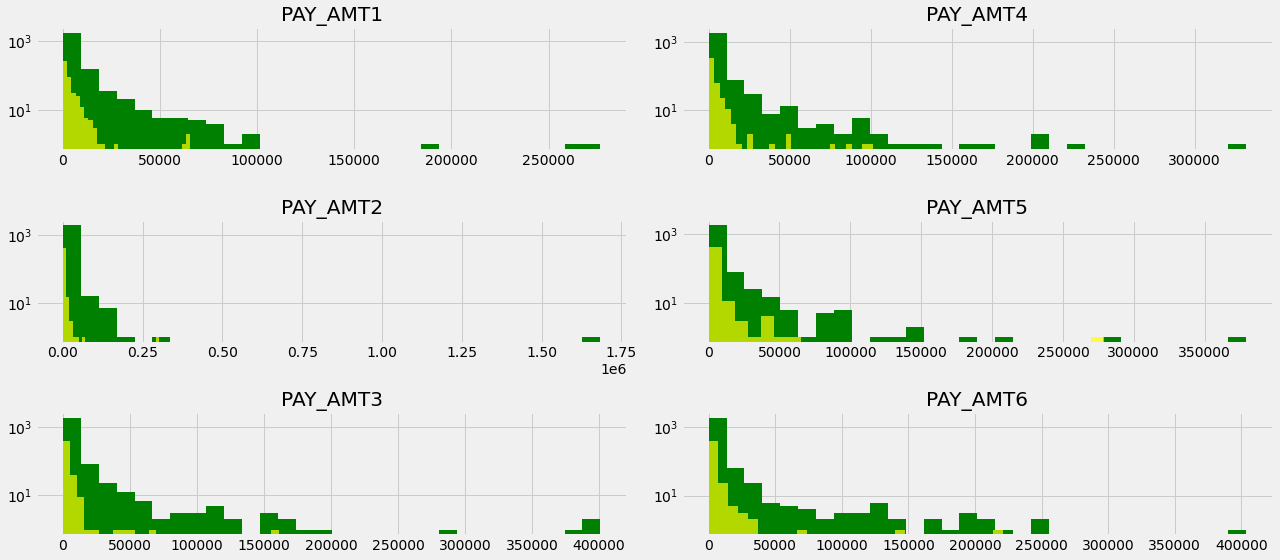

###***The above histogram shows the distribution of payment amount for each month explicitly for defaulters and non-defaulters.***

## Billing Amount Vs Default of payment

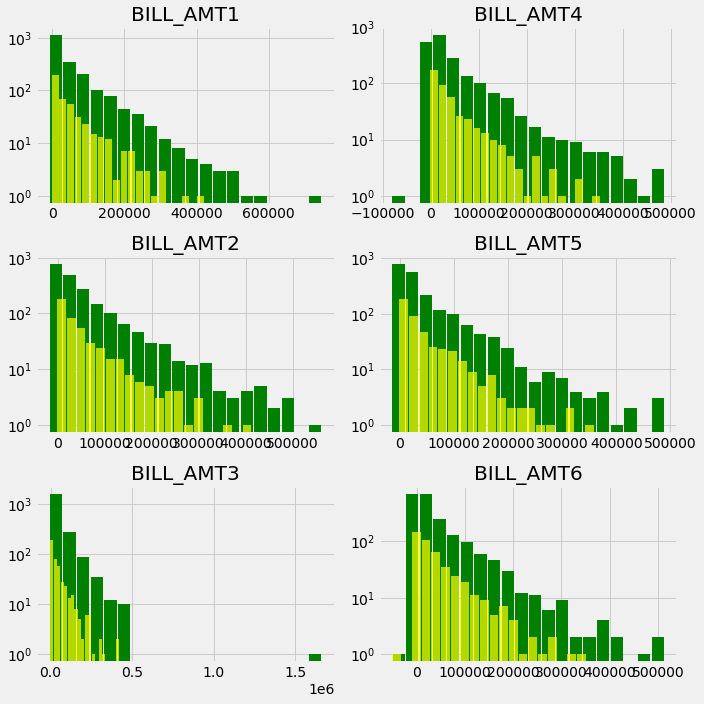

In [ ]:
bill_atm_columns =  getColumnsNames('BILL_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(10,10)


for i in range(len(pay_status_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(mydata[bill_atm_columns[i]], 20,rwidth=0.9, color ='green')
    ax[row,col].hist(mydata[bill_atm_columns[i]][(mydata['def_pay']==1)],20,rwidth=0.9,color='yellow',alpha = 0.7)
    ax[row,col].set_title(bill_atm_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()


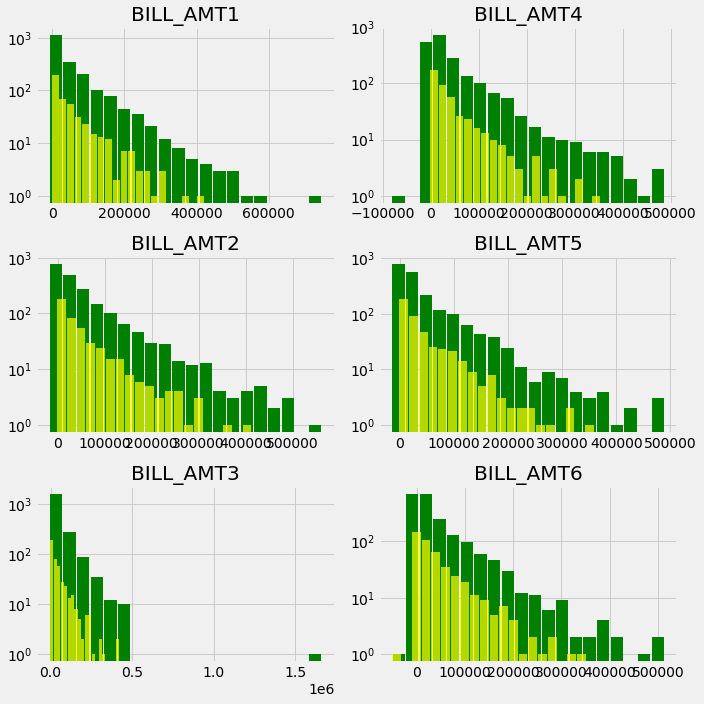

###***The directly above histogram reveals the allocation of the bill amount created for each calendar month explicitly for defaulters and non-defaulters.***

## Age Vs Default of payment

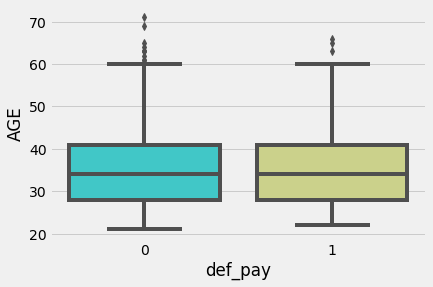

In [ ]:
sns.boxplot(x='def_pay',y='AGE',data=mydata,palette='rainbow')

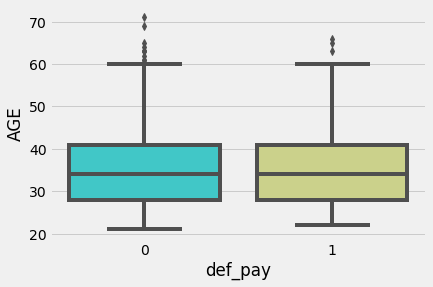

## Default of payment Vs Status of Married and Age

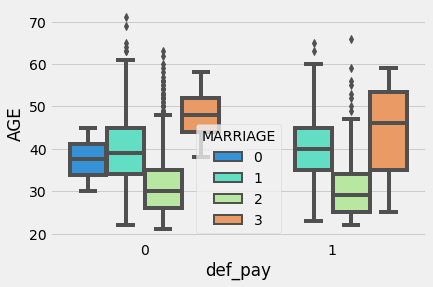

In [ ]:
sns.boxplot(x='def_pay',hue='MARRIAGE', y='AGE',data=mydata,palette="rainbow")
#<matplotlib.axes._subplots.AxesSubplot at 0x7f312786f810>

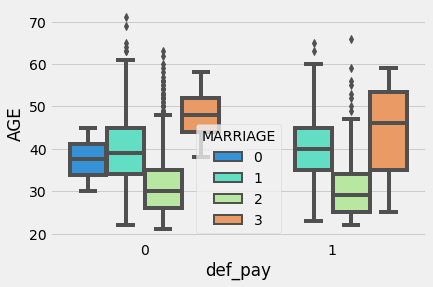

## Default of payment Vs Education and Age

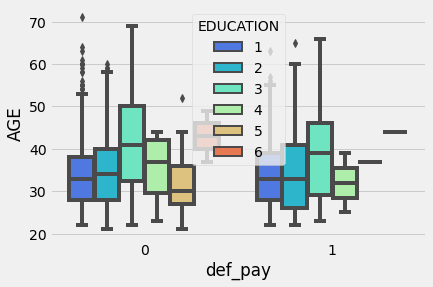

In [ ]:
sns.boxplot(x='def_pay',hue='EDUCATION', y='AGE',data=mydata,palette="rainbow" )
#<matplotlib.axes._subplots.AxesSubplot at 0x7f31279460d0>

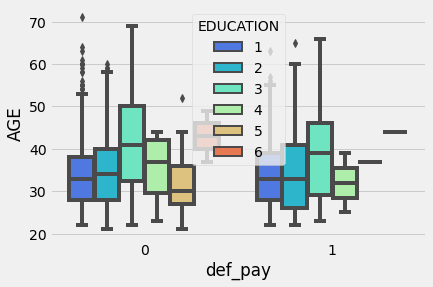

## Default of payment Vs Education Vs Limit Balance

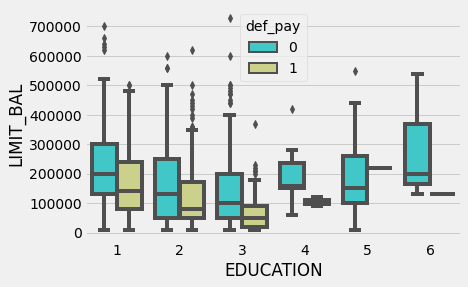

In [ ]:
sns.boxplot(x='EDUCATION',hue='def_pay', y='LIMIT_BAL',data=mydata,palette="rainbow")

## Default of payment Vs Marriage Vs Limit Balance

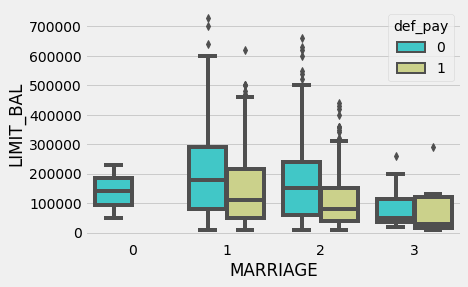

In [ ]:
sns.boxplot(x='MARRIAGE',hue='def_pay', y='LIMIT_BAL',data=mydata,palette="rainbow")
#<matplotlib.axes._subplots.AxesSubplot at 0x7f31285b5190>

###The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution. 

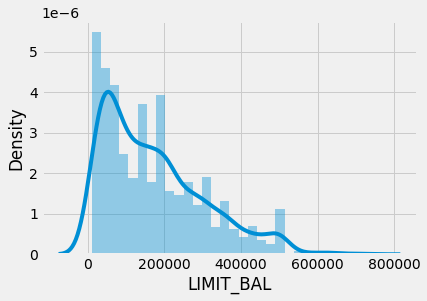

In [ ]:
sns.distplot(mydata['LIMIT_BAL'],kde=True,bins=30)

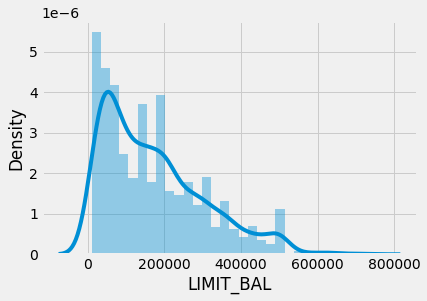



## plot columns with similar names to check the correlation

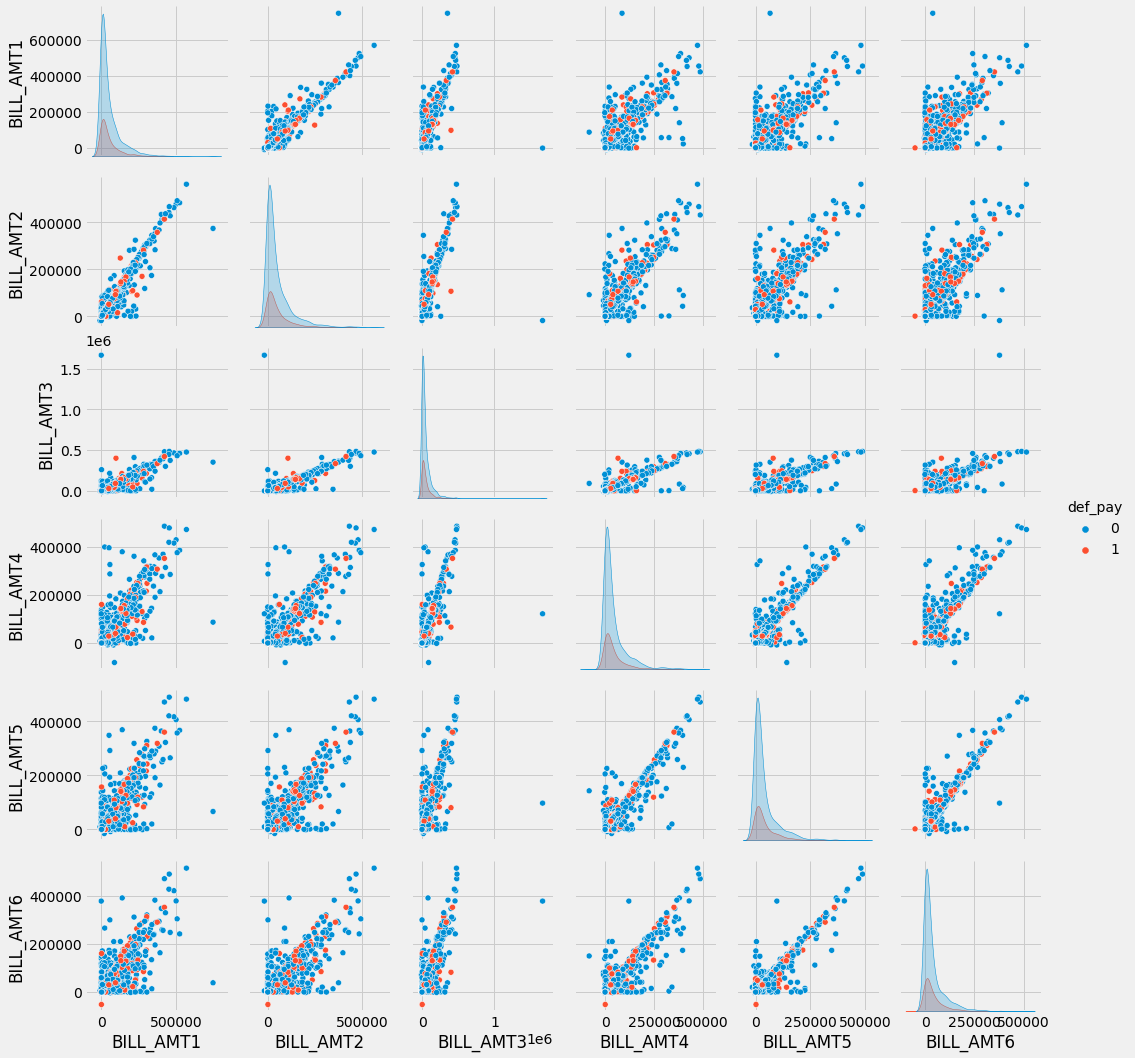

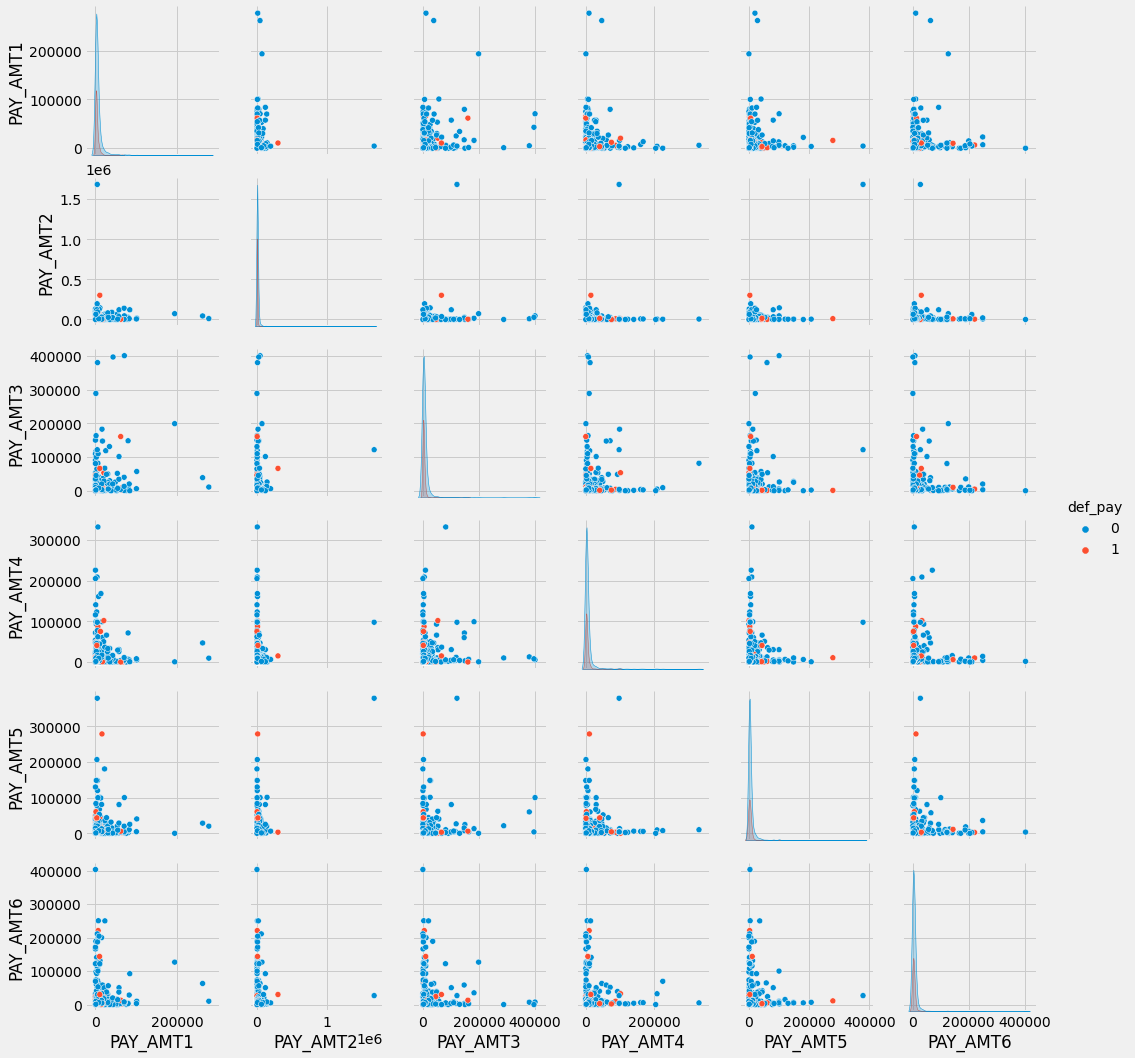

In [ ]:
sns.pairplot(mydata, vars=mydata.columns[11:17], kind='scatter',hue= 'def_pay')
sns.pairplot(mydata, vars=mydata.columns[17:23],hue = 'def_pay')

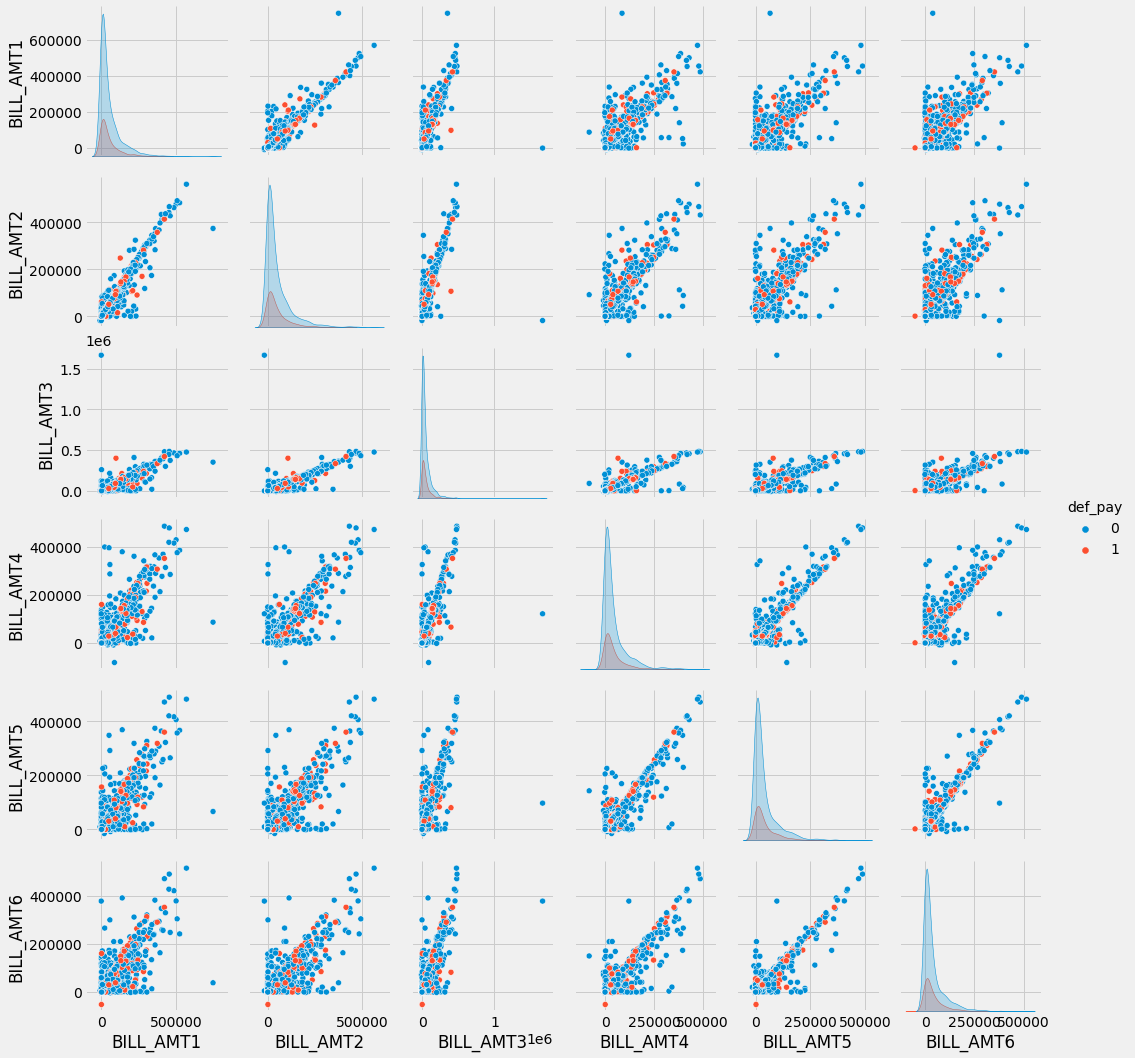

##Observing Correlation between features of the Dataset

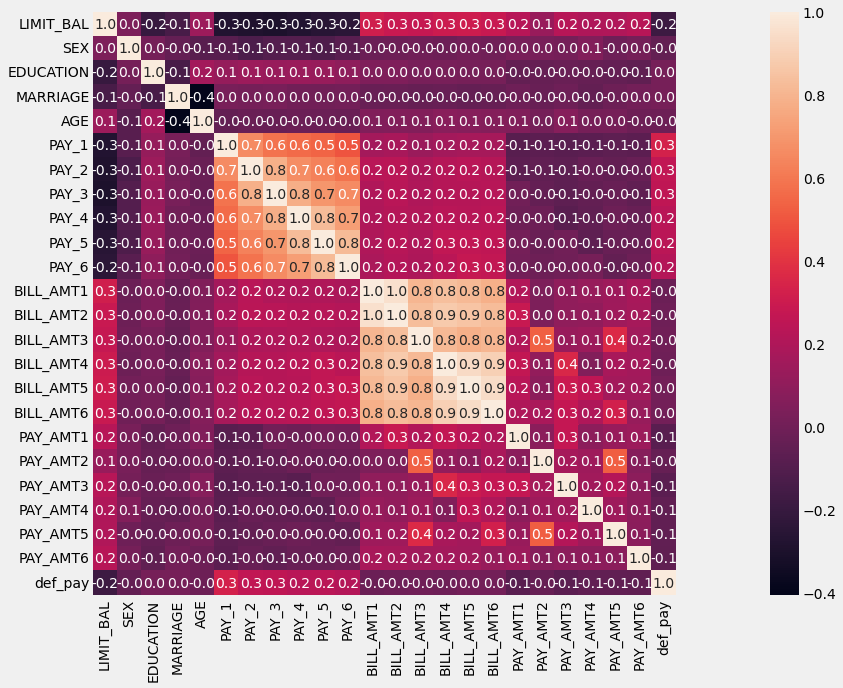

In [ ]:
correlation = mydata.corr()
plt.subplots(figsize=(30,10))
sns.heatmap( correlation, square=True, annot=True, fmt=".1f" ) 


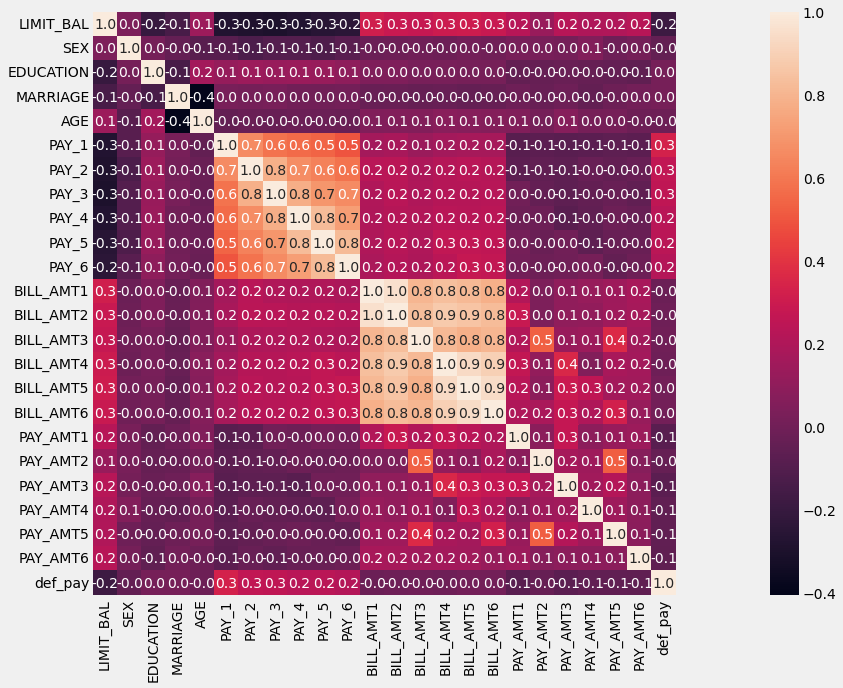

##Corelation with Default

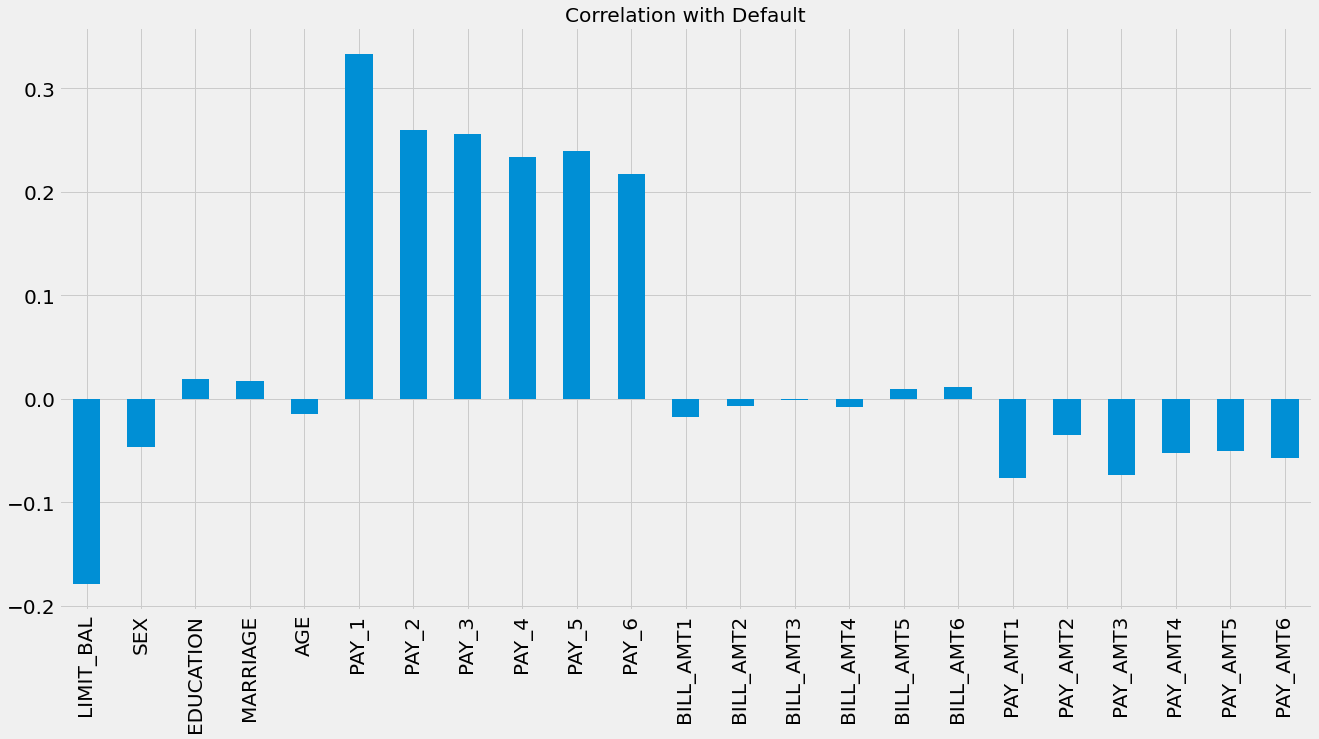

In [ ]:
X = mydata.drop(['def_pay'],axis=1)
X.corrwith(mydata['def_pay']).plot.bar(figsize = (20, 10), title = "Correlation with Default", 
                                        fontsize = 20,rot = 90, grid = True)

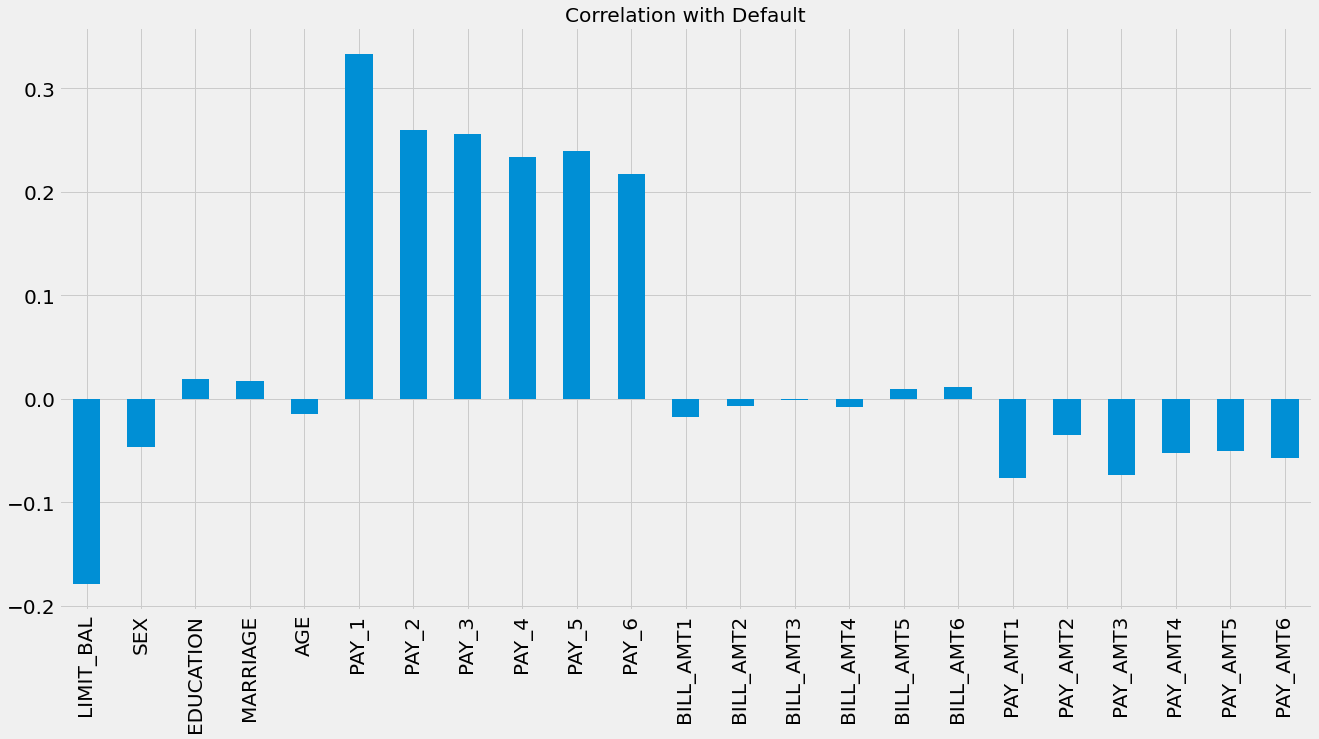

###***It appears from the over chart is that most negatively correlated feature is LIMIT_BAL but we cannot carelessly eliminate this feature because corresponding it is especially critical aspect for prediction.***

##Joinplot for limit balance Vs Age

##Draw a plot of two variables with bivariate and univariate graphs.



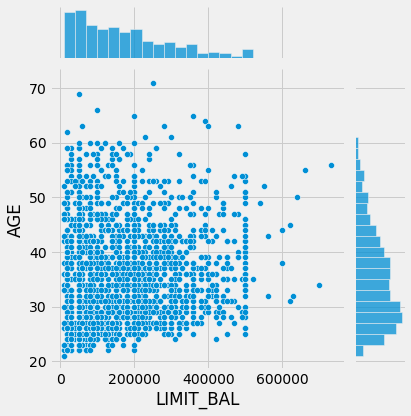

In [ ]:
sns.jointplot(x='LIMIT_BAL',y='AGE',data=mydata,kind="scatter")

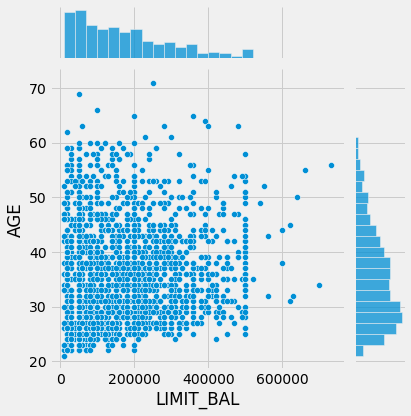

##Joinplot for limit balance Vs Age

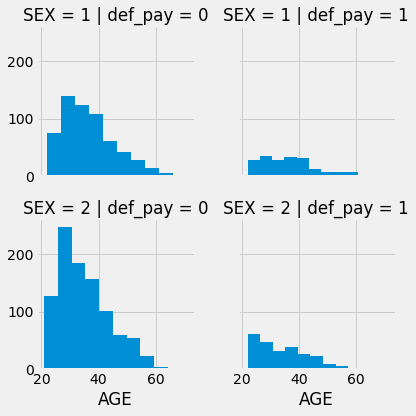

In [ ]:
g = sns.FacetGrid(mydata, col = 'def_pay', row = 'SEX')
g.map(plt.hist, 'AGE')


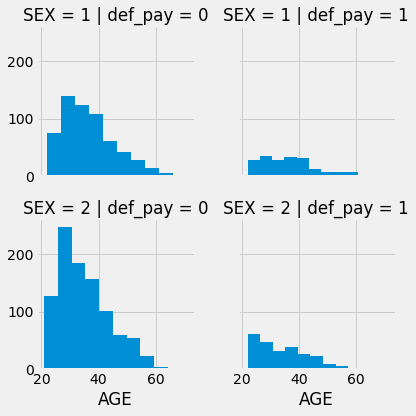

### ***After the Graphic above We can report that the non-Defaults have got a greater segment of females aged between 30 to 40 years.***

##Facet Grid of default of Payment  Vs Married and Gender

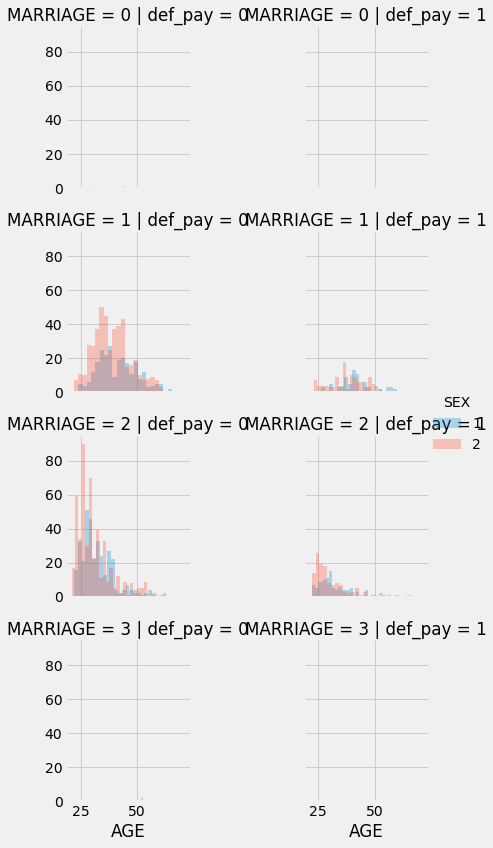

In [ ]:
g = sns.FacetGrid(mydata, col='def_pay', row= "MARRIAGE", hue='SEX')
g.map(plt.hist, 'AGE', alpha=0.3, bins=25) 
g.add_legend()


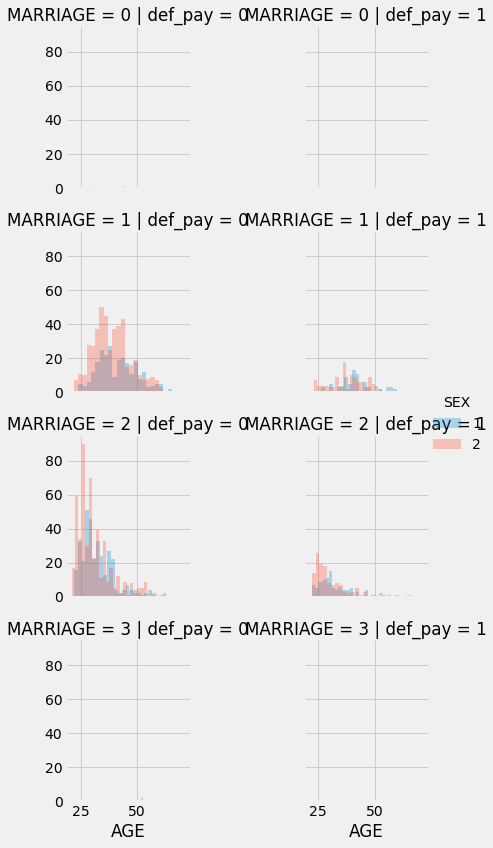

###***If we look at the default profile from marriage status, most default customers are married (and they were given a  higher limit balance too).***

#Data Cleaning

###***EDUCATION has 6 and groups 5 and 6 are unlabeled, also the category 0 is undocumented.***

###***MARRIAGE has a label 0 that is undocumented.***


##Data Transformation

###The 0 in MARRIAGE can be safely categorized as 'Other' (thus 3).

###The 0 (undocumented), 5, and 6 (label unknown) in EDUCATION can also be put in an 'Other' category (thus 4)

In [ ]:
fil = (mydata.EDUCATION == 5) | (mydata.EDUCATION == 6) | (mydata.EDUCATION == 0)
mydata.loc[fil, 'EDUCATION'] = 4
mydata.EDUCATION.value_counts()


2    925
1    715
3    325
4     35
Name: EDUCATION, dtype: int64

* 2  =  925
* 1  =  715
* 3  =  325
* 4  =   35
* Name: EDUCATION, dtype: int64

##Marriage Attribute



In [ ]:
mydata.loc[mydata.MARRIAGE == 0, 'MARRIAGE'] = 3
mydata.MARRIAGE.value_counts()


2    1076
1     904
3      20
Name: MARRIAGE, dtype: int64

### 2  =  1076
### 1  =   904
### 3  =    20
###Name: MARRIAGE, dtype: int64

##Clean the payments Attribute



In [ ]:
fil = (mydata.PAY_1 == -1) | (mydata.PAY_1==-2)
mydata.loc[fil,'PAY_1']=0
mydata.PAY_1.value_counts()
fil = (mydata.PAY_2 == -1) | (mydata.PAY_2==-2)
mydata.loc[fil,'PAY_2']=0
mydata.PAY_2.value_counts()
fil = (mydata.PAY_3 == -1) | (mydata.PAY_3==-2)
mydata.loc[fil,'PAY_3']=0
mydata.PAY_3.value_counts()
fil = (mydata.PAY_4 == -1) | (mydata.PAY_4==-2)
mydata.loc[fil,'PAY_4']=0
mydata.PAY_4.value_counts()
fil = (mydata.PAY_5 == -1) | (mydata.PAY_5==-2)
mydata.loc[fil,'PAY_5']=0
mydata.PAY_5.value_counts()
fil = (mydata.PAY_6 == -1) | (mydata.PAY_6==-2)
mydata.loc[fil,'PAY_6']=0
mydata.PAY_6.value_counts()

0    1788
2     190
3      10
4       5
7       3
5       2
6       2
Name: PAY_6, dtype: int64

##0 =   1788
##2 =    190
##3 =     10
##4 =      5
##7 =      3
##5 =      2
##6 =      2
##Name: PAY_6, dtype: int64

In [ ]:
mydata.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
ID                                                                            
10748     310000    1          3         1   32      0      0      0      0   
12574      10000    2          3         1   49      0      0      0      0   
29677      50000    1          2         1   28      0      0      0      0   
8857       80000    2          3         1   52      2      2      3      3   
21099     270000    1          1         2   34      1      2      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
ID            ...                                                        
10748      0  ...      84373      57779      14163      8295      6000   
12574      2  ...       1690       1138        930         0         0   
29677      0  ...      45975       1300      43987         0     46257   
8857       3  ...      40748      39816      40607      3700      1600   
21099      2  ...      22448      15490      17343         0      4000   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  def_pay  
ID                                                      
10748      4000      3000      1000      2000        0  
12574      2828         0       182         0        1  
29677      2200      1300     43987      1386        0  
8857       1600         0      1600      1600        1  
21099      2000         0      2000      2000        0  

[5 rows x 24 columns]

|ID|LIMIT\_BAL|SEX|EDUCATION|MARRIAGE|AGE|PAY\_1|PAY\_2|PAY\_3|PAY\_4|PAY\_5|PAY\_6|BILL\_AMT1|BILL\_AMT2|BILL\_AMT3|BILL\_AMT4|BILL\_AMT5|BILL\_AMT6|PAY\_AMT1|PAY\_AMT2|PAY\_AMT3|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|10748|310000|1|3|1|32|0|0|0|0|0|0|172772|152397|110375|84373|57779|14163|8295|6000|4000|
|12574|10000|2|3|1|49|0|0|0|0|2|2|32|-358|-748|1690|1138|930|0|0|2828|
|29677|50000|1|2|1|28|0|0|0|0|0|0|430|0|46257|45975|1300|43987|0|46257|2200|
|8857|80000|2|3|1|52|2|2|3|3|3|2|36649|39448|40101|40748|39816|40607|3700|1600|1600|
|21099|270000|1|1|2|34|1|2|0|0|2|0|20979|17228|20924|22448|15490|17343|0|4000|2000|

##Plot Pay_1

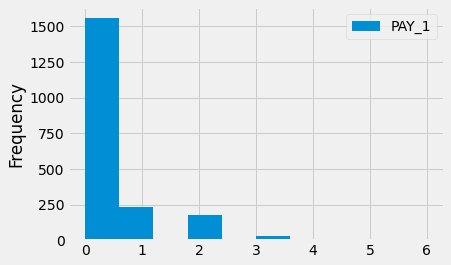

In [ ]:
mydata.plot(y = 'PAY_1',kind='hist')
plt.legend()
plt.show()


In [ ]:
mydata['PAY_1'].describe ()

count    2000.000000
mean        0.349000
std         0.734485
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.000000
Name: PAY_1, dtype: float64

###*count    2000.000000*
###*mean        0.349000*
###*std         0.734485*
###*min         0.000000*
###*25%         0.000000*
###*50%         0.000000*
###*75%         0.000000*
###*max         6.000000*
###*Name: PAY_1, dtype: float64*

In [ ]:
mydata.SEX.nunique()

2

## 2 

In [ ]:
mydata[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

PAY_AMT1      PAY_AMT2       PAY_AMT3       PAY_AMT4  \
count    2000.000000  2.000000e+03    2000.000000    2000.000000   
mean     5153.111500  6.362411e+03    6096.214000    5091.073500   
std     13065.162427  4.014712e+04   21880.625777   16197.840731   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%      1000.000000  9.947500e+02     445.500000     328.250000   
50%      2022.500000  2.031500e+03    1843.000000    1597.500000   
75%      5000.000000  5.000000e+03    5000.000000    4295.500000   
max    276698.000000  1.684259e+06  400972.000000  331788.000000   

            PAY_AMT5       PAY_AMT6  
count    2000.000000    2000.000000  
mean     5043.292500    5738.555500  
std     16448.820691   21310.318739  
min         0.000000       0.000000  
25%       260.250000     166.750000  
50%      1500.000000    1464.000000  
75%      4207.750000    4000.000000  
max    379267.000000  403500.000000

|index|PAY\_AMT1|PAY\_AMT2|PAY\_AMT3|PAY\_AMT4|PAY\_AMT5|PAY\_AMT6|
|---|---|---|---|---|---|---|
|count|2000\.0|2000\.0|2000\.0|2000\.0|2000\.0|2000\.0|
|mean|5153\.1115|6362\.411|6096\.214|5091\.0735|5043\.2925|5738\.5555|
|std|13065\.162426571058|40147\.124371288664|21880\.625777006484|16197\.840730642629|16448\.82069101023|21310\.31873858976|
|min|0\.0|0\.0|0\.0|0\.0|0\.0|0\.0|
|25%|1000\.0|994\.75|445\.5|328\.25|260\.25|166\.75|
|50%|2022\.5|2031\.5|1843\.0|1597\.5|1500\.0|1464\.0|
|75%|5000\.0|5000\.0|5000\.0|4295\.5|4207\.75|4000\.0|
|max|276698\.0|1684259\.0|400972\.0|331788\.0|379267\.0|403500\.0|

In [ ]:
mydata.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

In [ ]:
mydata.shape



(2000, 24)

###(2000, 24)

In [ ]:
mydata.columns = mydata.columns.map(str.lower)

mydata.head()


limit_bal  sex  education  marriage  age  pay_1  pay_2  pay_3  pay_4  \
ID                                                                            
10748     310000    1          3         1   32      0      0      0      0   
12574      10000    2          3         1   49      0      0      0      0   
29677      50000    1          2         1   28      0      0      0      0   
8857       80000    2          3         1   52      2      2      3      3   
21099     270000    1          1         2   34      1      2      0      0   

       pay_5  ...  bill_amt4  bill_amt5  bill_amt6  pay_amt1  pay_amt2  \
ID            ...                                                        
10748      0  ...      84373      57779      14163      8295      6000   
12574      2  ...       1690       1138        930         0         0   
29677      0  ...      45975       1300      43987         0     46257   
8857       3  ...      40748      39816      40607      3700      1600   
21099      2  ...      22448      15490      17343         0      4000   

       pay_amt3  pay_amt4  pay_amt5  pay_amt6  def_pay  
ID                                                      
10748      4000      3000      1000      2000        0  
12574      2828         0       182         0        1  
29677      2200      1300     43987      1386        0  
8857       1600         0      1600      1600        1  
21099      2000         0      2000      2000        0  

[5 rows x 24 columns]

|ID|limit\_bal|sex|education|marriage|age|pay\_1|pay\_2|pay\_3|pay\_4|pay\_5|pay\_6|bill\_amt1|bill\_amt2|bill\_amt3|bill\_amt4|bill\_amt5|bill\_amt6|pay\_amt1|pay\_amt2|pay\_amt3|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|10748|310000|1|3|1|32|0|0|0|0|0|0|172772|152397|110375|84373|57779|14163|8295|6000|4000|
|12574|10000|2|3|1|49|0|0|0|0|2|2|32|-358|-748|1690|1138|930|0|0|2828|
|29677|50000|1|2|1|28|0|0|0|0|0|0|430|0|46257|45975|1300|43987|0|46257|2200|
|8857|80000|2|3|1|52|2|2|3|3|3|2|36649|39448|40101|40748|39816|40607|3700|1600|1600|
|21099|270000|1|1|2|34|1|2|0|0|2|0|20979|17228|20924|22448|15490|17343|0|4000|2000|

###Feature Scaling of Numerical Attributes

In [ ]:
col_to_norm = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6']
mydata[col_to_norm] = mydata[col_to_norm].apply(lambda x : (x-np.mean(x))/np.std(x))

mydata.head(10)


limit_bal  sex  education  marriage       age  pay_1  pay_2  pay_3  \
ID                                                                          
10748   1.050233    1          3         1 -0.378229      0      0      0   
12574  -1.229991    2          3         1  1.481197      0      0      0   
29677  -0.925961    1          2         1 -0.815741      0      0      0   
8857   -0.697939    2          3         1  1.809331      2      2      3   
21099   0.746203    1          1         2 -0.159473      1      2      0   
17459  -0.241894    2          3         1 -0.596985      0      0      0   
1477    0.214151    1          2         2 -1.034497      0      0      0   
5121   -0.165886    1          2         2  0.168661      0      0      0   
18339  -1.153983    2          2         2 -1.472009      0      0      0   
28280   0.442173    2          2         2  0.059283      0      0      0   

       pay_4  pay_5  ...  bill_amt4  bill_amt5  bill_amt6  pay_amt1  pay_amt2  \
ID                   ...                                                        
10748      0      0  ...   0.607543   0.262893  -0.421472  0.240538 -0.009029   
12574      0      2  ...  -0.648831  -0.651960  -0.640356 -0.394515 -0.158517   
29677      0      0  ...   0.024083  -0.649344   0.071838 -0.394515  0.993958   
8857       3      3  ...  -0.055342  -0.027241   0.015930 -0.111248 -0.118654   
21099      0      2  ...  -0.333412  -0.420150  -0.368873 -0.394515 -0.058859   
17459      0      2  ...   0.574934   0.379525   0.350731 -0.034690 -0.046277   
1477       0      0  ...  -0.431131  -0.466618  -0.546570  0.597455 -0.061749   
5121       0      0  ...   0.312288   0.327888   0.319948 -0.203118 -0.096230   
18339      0      0  ...  -0.375077  -0.350245  -0.324825 -0.164839 -0.083748   
28280      0      0  ...  -0.664543  -0.656983  -0.616702 -0.326760 -0.141849   

       pay_amt3  pay_amt4  pay_amt5  pay_amt6  def_pay  
ID                                                      
10748 -0.095826 -0.129128 -0.245872 -0.175478        0  
12574 -0.149403 -0.314384 -0.295614 -0.269353        1  
29677 -0.178111 -0.234107  2.368160 -0.204297        0  
8857  -0.205540 -0.314384 -0.209386 -0.194253        1  
21099 -0.187254 -0.314384 -0.185062 -0.175478        0  
17459  0.311302 -0.314384 -0.172292 -0.161397        0  
1477  -0.049655 -0.271158 -0.284790 -0.188949        0  
5121  -0.105883 -0.178530 -0.185062 -0.175478        0  
18339 -0.141540 -0.190880 -0.245750 -0.232601        0  
28280 -0.248694 -0.263315 -0.162198 -0.225091        0  

[10 rows x 24 columns]

|ID|limit\_bal|sex|education|marriage|age|pay\_1|pay\_2|pay\_3|pay\_4|pay\_5|pay\_6|bill\_amt1|bill\_amt2|bill\_amt3|bill\_amt4|bill\_amt5|bill\_amt6|pay\_amt1|pay\_amt2|pay\_amt3|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|10748|1\.0502331300276524|1|3|1|-0\.3782291586476887|0|0|0|0|0|0|1\.557993061678812|1\.4014629044544311|0\.7916757745312201|0\.6075429952228916|0\.2628931945422709|-0\.42147246282427697|0\.24053847661384364|-0\.009029330055814366|-0\.0958262469945153|
|12574|-1\.229990781738555|2|3|1|1\.481197011685079|0|0|0|0|2|2|-0\.6954246243668233|-0\.6927620970026518|-0\.624152471100015|-0\.6488309001256655|-0\.6519602511902332|-0\.6403556804319344|-0\.3945148244539164|-0\.1585170120932972|-0\.14940301037724812|
|29677|-0\.925960926836394|1|2|1|-0\.815741198725987|0|0|0|0|0|0|-0\.6902326581803803|-0\.6878540249230365|-0\.025257492689639054|0\.02408273333599958|-0\.6493436614723845|0\.07183767712363918|-0\.3945148244539164|0\.9939582725746766|-0\.17811137846970224|
|8857|-0\.6979385356597733|2|3|1|1\.8093310417438029|2|2|3|3|3|2|-0\.21775069007289583|-0\.1470338366641971|-0\.10369164835593571|-0\.05534189265709341|-0\.02724138015967592|0\.015930076767417457|-0\.1112481319945177|-0\.1186536302166351|-0\.2055397556280979|
|21099|0\.7462032751254913|1|1|2|-0\.15947313860853957|1|2|0|0|2|0|-0\.42216805223762377|-0\.4516633383654598|-0\.34802754881281855|-0\.3334116565127662|-0\.42014978433490047|-0\.36887300450096777|-0\.3945148244539164|-0\.058858557401641975|-0\.18725417085583412|
|17459|-0\.24189375330653182|2|3|1|-0\.5969851786868379|0|0|0|0|2|0|0\.5194041472726336|0\.632444783890573|0\.6340939621074454|0\.5749343770133685|0\.37952525844711743|0\.35073059120832983|-0\.03468956646495049|-0\.046276677496820504|0\.31130229795993747|
|1477|0\.21415102904670963|1|2|2|-1\.0344972187651362|0|0|0|0|0|0|-0\.6730522072568993|-0\.5258465172000922|-0\.4333801168453919|-0\.4311311456578936|-0\.46661847950928675|-0\.5465698537988642|0\.597454509112686|-0\.06174865258769997|-0\.049655145444549284|
|5121|-0\.16588628958099158|1|2|2|0\.16866089145018417|0|0|0|0|0|0|0\.20442921367548267|0\.1794900536156847|0\.20247676630636263|0\.3122876082567944|0\.327887990990561|0\.31994832959207875|-0\.20311841062999836|-0\.09623047791101268|-0\.10588331861926037|
|18339|-1\.1539833180130148|2|2|2|-1\.4720092588434344|0|0|0|0|0|0|-0\.47420512037260143|-0\.4416278390294866|-0\.37352247173163916|-0\.3750765358839277|-0\.35024484421854873|-0\.32482509333273746|-0\.16483912786521476|-0\.08374825646088287|-0\.14154020892517472|
|28280|0\.4421734202233304|2|2|2|0\.05928288143060959|0|0|0|0|0|0|-0\.6846493377587782|-0\.6757209417094623|-0\.6060983452749431|-0\.6645426015369641|-0\.6569834573769673|-0\.6167024648966098|-0\.3267604939602494|-0\.14184913554611786|-0\.24869373569064038|

##Feature Scaling of Numerical Attributes

In [ ]:
col_to_norm = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6']
mydata[col_to_norm] = mydata[col_to_norm].apply(lambda x : (x-np.mean(x))/np.std(x))

In [ ]:
mydata.head(10)

limit_bal  sex  education  marriage       age  pay_1  pay_2  pay_3  \
ID                                                                          
10748   1.050233    1          3         1 -0.378229      0      0      0   
12574  -1.229991    2          3         1  1.481197      0      0      0   
29677  -0.925961    1          2         1 -0.815741      0      0      0   
8857   -0.697939    2          3         1  1.809331      2      2      3   
21099   0.746203    1          1         2 -0.159473      1      2      0   
17459  -0.241894    2          3         1 -0.596985      0      0      0   
1477    0.214151    1          2         2 -1.034497      0      0      0   
5121   -0.165886    1          2         2  0.168661      0      0      0   
18339  -1.153983    2          2         2 -1.472009      0      0      0   
28280   0.442173    2          2         2  0.059283      0      0      0   

       pay_4  pay_5  ...  bill_amt4  bill_amt5  bill_amt6  pay_amt1  pay_amt2  \
ID                   ...                                                        
10748      0      0  ...   0.607543   0.262893  -0.421472  0.240538 -0.009029   
12574      0      2  ...  -0.648831  -0.651960  -0.640356 -0.394515 -0.158517   
29677      0      0  ...   0.024083  -0.649344   0.071838 -0.394515  0.993958   
8857       3      3  ...  -0.055342  -0.027241   0.015930 -0.111248 -0.118654   
21099      0      2  ...  -0.333412  -0.420150  -0.368873 -0.394515 -0.058859   
17459      0      2  ...   0.574934   0.379525   0.350731 -0.034690 -0.046277   
1477       0      0  ...  -0.431131  -0.466618  -0.546570  0.597455 -0.061749   
5121       0      0  ...   0.312288   0.327888   0.319948 -0.203118 -0.096230   
18339      0      0  ...  -0.375077  -0.350245  -0.324825 -0.164839 -0.083748   
28280      0      0  ...  -0.664543  -0.656983  -0.616702 -0.326760 -0.141849   

       pay_amt3  pay_amt4  pay_amt5  pay_amt6  def_pay  
ID                                                      
10748 -0.095826 -0.129128 -0.245872 -0.175478        0  
12574 -0.149403 -0.314384 -0.295614 -0.269353        1  
29677 -0.178111 -0.234107  2.368160 -0.204297        0  
8857  -0.205540 -0.314384 -0.209386 -0.194253        1  
21099 -0.187254 -0.314384 -0.185062 -0.175478        0  
17459  0.311302 -0.314384 -0.172292 -0.161397        0  
1477  -0.049655 -0.271158 -0.284790 -0.188949        0  
5121  -0.105883 -0.178530 -0.185062 -0.175478        0  
18339 -0.141540 -0.190880 -0.245750 -0.232601        0  
28280 -0.248694 -0.263315 -0.162198 -0.225091        0  

[10 rows x 24 columns]

|ID|limit\_bal|sex|education|marriage|age|pay\_1|pay\_2|pay\_3|pay\_4|pay\_5|pay\_6|bill\_amt1|bill\_amt2|bill\_amt3|bill\_amt4|bill\_amt5|bill\_amt6|pay\_amt1|pay\_amt2|pay\_amt3|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|10748|1\.0502331300276524|1|3|1|-0\.37822915864768886|0|0|0|0|0|0|1\.557993061678812|1\.4014629044544311|0\.7916757745312201|0\.6075429952228916|0\.262893194542271|-0\.4214724628242769|0\.24053847661384364|-0\.009029330055814353|-0\.09582624699451532|
|12574|-1\.229990781738555|2|3|1|1\.4811970116850788|0|0|0|0|2|2|-0\.6954246243668233|-0\.6927620970026518|-0\.624152471100015|-0\.6488309001256655|-0\.6519602511902332|-0\.6403556804319344|-0\.3945148244539164|-0\.15851701209329716|-0\.14940301037724812|
|29677|-0\.925960926836394|1|2|1|-0\.8157411987259873|0|0|0|0|0|0|-0\.6902326581803803|-0\.6878540249230365|-0\.025257492689639113|0\.024082733335999636|-0\.6493436614723845|0\.07183767712363923|-0\.3945148244539164|0\.9939582725746764|-0\.17811137846970224|
|8857|-0\.6979385356597733|2|3|1|1\.8093310417438027|2|2|3|3|3|2|-0\.21775069007289577|-0\.14703383666419714|-0\.10369164835593576|-0\.055341892657093356|-0\.027241380159675865|0\.015930076767417502|-0\.1112481319945177|-0\.11865363021663507|-0\.2055397556280979|
|21099|0\.7462032751254913|1|1|2|-0\.1594731386085397|1|2|0|0|2|0|-0\.4221680522376237|-0\.45166333836545974|-0\.3480275488128186|-0\.33341165651276616|-0\.42014978433490047|-0\.3688730045009677|-0\.3945148244539164|-0\.05885855740164195|-0\.18725417085583412|
|17459|-0\.24189375330653182|2|3|1|-0\.5969851786868381|0|0|0|0|2|0|0\.5194041472726336|0\.632444783890573|0\.6340939621074454|0\.5749343770133685|0\.37952525844711754|0\.3507305912083299|-0\.03468956646495051|-0\.04627667749682048|0\.31130229795993747|
|1477|0\.21415102904670963|1|2|2|-1\.0344972187651365|0|0|0|0|0|0|-0\.6730522072568993|-0\.5258465172000922|-0\.43338011684539196|-0\.43113114565789357|-0\.46661847950928675|-0\.5465698537988642|0\.597454509112686|-0\.061748652587699945|-0\.0496551454445493|
|5121|-0\.16588628958099158|1|2|2|0\.16866089145018404|0|0|0|0|0|0|0\.20442921367548272|0\.17949005361568465|0\.20247676630636255|0\.31228760825679447|0\.3278879909905611|0\.3199483295920788|-0\.20311841062999836|-0\.09623047791101265|-0\.1058833186192604|
|18339|-1\.1539833180130148|2|2|2|-1\.4720092588434346|0|0|0|0|0|0|-0\.4742051203726014|-0\.44162783902948655|-0\.3735224717316392|-0\.37507653588392764|-0\.35024484421854873|-0\.3248250933327374|-0\.16483912786521476|-0\.08374825646088285|-0\.14154020892517472|
|28280|0\.4421734202233304|2|2|2|0\.059282881430609446|0|0|0|0|0|0|-0\.6846493377587782|-0\.6757209417094623|-0\.6060983452749431|-0\.6645426015369641|-0\.6569834573769673|-0\.6167024648966098|-0\.3267604939602494|-0\.14184913554611783|-0\.24869373569064038|

In [ ]:
mydata.tail(10)

limit_bal  sex  education  marriage       age  pay_1  pay_2  pay_3  \
ID                                                                          
18551  -0.165886    2          1         2 -1.253253      0      0      0   
16366   0.974226    2          1         2 -0.050095      0      0      0   
12273   1.050233    2          1         2 -0.706363      0      0      0   
19325  -0.089879    2          3         1  0.278039      0      0      0   
553    -0.925961    1          1         1  2.246843      0      0      0   
23296  -0.089879    2          1         2 -1.143875      0      0      0   
15149   0.594188    1          1         1  1.918709      0      0      0   
18667  -0.925961    2          1         2 -1.362631      0      0      0   
3416    0.214151    2          2         1  0.168661      0      0      0   
18715   1.886315    2          1         2 -0.815741      0      0      0   

       pay_4  pay_5  ...  bill_amt4  bill_amt5  bill_amt6  pay_amt1  pay_amt2  \
ID                   ...                                                        
18551      0      0  ...  -0.674511  -0.670341  -0.655739 -0.394515 -0.158517   
16366      0      0  ...  -0.661002  -0.655982  -0.643515 -0.368179 -0.136318   
12273      0      0  ...  -0.114983  -0.040631  -0.121407 -0.241398 -0.118155   
19325      0      0  ...  -0.671365  -0.666998  -0.652315 -0.378667 -0.153360   
553        0      0  ...  -0.236254  -0.179343  -0.159898 -0.203118 -0.121145   
23296      0      0  ...  -0.641097  -0.494997  -0.655739 -0.317956  0.126157   
15149      0      0  ...  -0.674511  -0.670341  -0.655739 -0.394515 -0.158517   
18667      0      0  ...  -0.674511  -0.670341  -0.655739 -0.394515 -0.158517   
3416       0      0  ...   2.238840   2.095960   1.851006  0.219255  0.040800   
18715      0      0  ...   0.322164   0.257385  -0.142497 -0.317191  1.448799   

       pay_amt3  pay_amt4  pay_amt5  pay_amt6  def_pay  
ID                                                      
18551 -0.278682 -0.314384 -0.306682 -0.269353        1  
16366 -0.238042 -0.259487 -0.261743 -0.184537        0  
12273 -0.217791 -0.143208 -0.215467 -0.198947        0  
19325 -0.269219 -0.301602 -0.294094 -0.259637        0  
553   -0.228397 -0.190880 -0.215467 -0.221617        1  
23296 -0.178157  0.303136 -0.306682  0.193778        0  
15149 -0.278682 -0.314384 -0.306682 -0.269353        1  
18667 -0.278682 -0.314384 -0.306682 -0.269353        0  
3416   0.087030  0.241384  0.118987  0.012272        0  
18715 -0.168054 -0.223424 -0.242102 -0.221383        0  

[10 rows x 24 columns]

|ID|limit\_bal|sex|education|marriage|age|pay\_1|pay\_2|pay\_3|pay\_4|pay\_5|pay\_6|bill\_amt1|bill\_amt2|bill\_amt3|bill\_amt4|bill\_amt5|bill\_amt6|pay\_amt1|pay\_amt2|pay\_amt3|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
|18551|-0\.16588628958099158|2|1|2|-1\.2532532388042854|0|0|0|0|0|0|-0\.657998114344449|-0\.6878540249230365|-0\.6146221350963779|-0\.6745105668423915|-0\.6703409863687009|-0\.6557385408849776|-0\.3945148244539164|-0\.15851701209329716|-0\.27868209471715294|
|16366|0\.974225666302112|2|1|2|-0\.05009512858896513|0|0|0|0|0|0|-0\.6944984193436136|-0\.6831378886230709|-0\.6032698230920455|-0\.6610021504452498|-0\.6559820464972969|-0\.6435149560733658|-0\.3681786779117453|-0\.13631809131073097|-0\.23804238256079674|
|12273|1\.0502331300276524|2|1|2|-0\.7063631887064127|0|0|0|0|0|0|-0\.11413313374395932|-0\.13795801622647275|-0\.10746301126646594|-0\.11498253872996307|-0\.040631212728172994|-0\.12140743972894609|-0\.24139769339478198|-0\.1181553379431768|-0\.2177910974255146|
|19325|-0\.08987882585545134|2|3|1|0\.27803890146975857|0|0|0|0|0|0|-0\.6279160188018924|-0\.6850161173239293|-0\.6119847292771896|-0\.6713651875463191|-0\.666997566173672|-0\.6523146138809132|-0\.378667201389296|-0\.153359687063004|-0\.2692193045975065|
|553|-0\.925960926836394|1|1|1|2\.2468430818221012|0|0|0|0|0|0|-0\.0342577343480034|0\.012341408937836123|-0\.25551448768660356|-0\.23625438492297535|-0\.17934277135091528|-0\.15989767228188334|-0\.20311841062999836|-0\.12114509158392646|-0\.2283967365934276|
|23296|-0\.08987882585545134|2|1|2|-1\.143875228784711|0|0|0|0|0|0|-0\.6164362945705611|-0\.6613394679342767|-0\.469679484859245|-0\.6410966099725213|-0\.49499717169607743|-0\.6557385408849776|-0\.3179562589243492|0\.1261573637334159|-0\.1781570924316329|
|15149|0\.5941883476744109|1|1|1|1\.9187090517633771|0|0|0|0|0|0|-0\.6958420688843262|-0\.6878540249230365|-0\.6146221350963779|-0\.6745105668423915|-0\.6703409863687009|-0\.6557385408849776|-0\.3945148244539164|-0\.15851701209329716|-0\.27868209471715294|
|18667|-0\.925960926836394|2|1|2|-1\.36263124882386|0|0|0|0|0|0|-0\.6654207996712984|-0\.6878540249230365|-0\.6146221350963779|-0\.6745105668423915|-0\.6703409863687009|-0\.6557385408849776|-0\.3945148244539164|-0\.15851701209329716|-0\.27868209471715294|
|3416|0\.21415102904670963|2|2|1|0\.16866089145018404|0|0|0|0|0|0|1\.7063424070864244|1\.9054451327190627|1\.8134348192847929|2\.2388400246356492|2\.09595965799069|1\.8510060845544902|0\.21925519539662397|0\.040799897290013244|0\.08702960072812234|
|18715|1\.8863152310085949|2|1|2|-0\.8157411987259873|0|0|0|0|0|0|-0\.5930463564492238|-0\.6244740885429763|0\.20734386303549274|0\.322164403147843|0\.2573854347040834|-0\.14249684518876343|-0\.31719067326905354|1\.4487994597873908|-0\.16805430684495717|

## Spiliting Dataset into training(80%) and test set(20%)

In [ ]:
X = mydata.iloc[:,:-1].values
y = mydata.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

X_train.shape


(1600, 23)

(1600, 23)

In [ ]:
X_test.shape

(400, 23)

(400, 23)

#Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)

GaussianNB()

GaussianNB()

In [ ]:
y_pred =naive_bayes.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[262,  53],
       [ 40,  45]])

array([[262,  53],
       [ 40,  45]])

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model= pd.DataFrame([['Gaussian Naive Bayes', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

Model  Accuracy  Precision    Recall  F1 Score       ROC
0  Gaussian Naive Bayes    0.7675   0.459184  0.529412  0.491803  0.680579

|index|Model|Accuracy|Precision|Recall|F1 Score|ROC|
|---|---|---|---|---|---|---|
|0|Gaussian Naive Bayes|0\.7675|0\.45918367346938777|0\.5294117647058824|0\.4918032786885246|0\.6805788982259569|